# Student Stress Prediction

- Iteration number: 0
- Student: Ivan Bodnar

I have collected a couple of datasets from different sources, in order to see the correlation between different sets of factors and the stress level. This is also a step for the next iteration, as I want to make my own questionnaire to collect my own dataset.

The idea right now is to make eda and modeling for 3 datasets separately (because if I just mix all of them together it would be a complete mess), to see the correlations. 

In [2]:
# imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas.plotting import parallel_coordinates

## Figshare data

The dataset comes from https://figshare.com/articles/dataset/MHP_Anxiety_Stress_Depression_Dataset_of_University_Students/25771164?file=46172343. 

MHP (Anxiety, Stress, Depression) Dataset of University Students

"Research in assessing the Mental Health Problems (MHPs), e.g., stress, anxiety, and depression of university students has had much interest worldwide for the last decade. This article provides a large and comprehensive dataset concerning the MHPs of 2028 students from 15 top-ranked universities in Bangladesh. To collect the data, the following models (standardized scales/questionnaires) were adopted:
- GAD-7 (for Anxiety), 
- PSS-10 (for Stress), 
- PHQ-9 (for Depression) 
Additionally, student sociol-demographic data are collected." 

### Data Provisioning

The downloaded folder contains 6 files (5 csv + Questionnaire pdf). I will Use Processed.csv, as it combines anxiety, depression and stress metrics. 

In [3]:
figshare_data = pd.read_csv('figshare-data/Processed.csv')
figshare_data

Age  Gender                                         University  \
0     18-22  Female           Independent University, Bangladesh (IUB)   
1     18-22    Male           Independent University, Bangladesh (IUB)   
2     18-22    Male  American International University Bangladesh (...   
3     18-22    Male  American International University Bangladesh (...   
4     18-22    Male                       North South University (NSU)   
...     ...     ...                                                ...   
2023  18-22    Male                              Dhaka University (DU)   
2024  18-22  Female           Bangladesh Agricultural University (BAU)   
2025  18-22    Male  American International University Bangladesh (...   
2026  23-26  Female                              Dhaka University (DU)   
2027  18-22    Male           Independent University, Bangladesh (IUB)   

                                        Department              Academic_Year  \
0     Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
1     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
3     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
4     Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
...                                            ...                        ...   
2023                                         Other  Second Year or Equivalent   
2024  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2025  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
2026                                         Other   Third Year or Equivalent   
2027         Business and Entrepreneurship Studies  Second Year or Equivalent   

     Current_CGPA waiver_or_scholarship  PSS1  PSS2  PSS3  ...  PHQ2  PHQ3  \
0     2.50 - 2.99                    No     3     4     3  ...     2     3   
1     3.00 - 3.39                    No     3     3     4  ...     2     2   
2     3.00 - 3.39                    No     0     0     0  ...     0     0   
3     3.00 - 3.39                    No     3     1     2  ...     1     2   
4     2.50 - 2.99                    No     4     4     4  ...     3     3   
...           ...                   ...   ...   ...   ...  ...   ...   ...   
2023  3.00 - 3.39                    No     4     4     4  ...     1     3   
2024  3.00 - 3.39                    No     4     4     4  ...     3     3   
2025  2.50 - 2.99                    No     4     2     1  ...     1     2   
2026  3.40 - 3.79                    No     4     4     4  ...     3     3   
2027  2.50 - 2.99                    No     2     2     3  ...     2     1   

      PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9 Depression Value  \
0        2     2     2     2     3     2               20   
1        2     2     2     2     2     2               19   
2        0     0     0     0     0     0                0   
3        1     2     1     2     2     1               14   
4        3     1     3     0     3     3               20   
...    ...   ...   ...   ...   ...   ...              ...   
2023     3     0     3     2     2     3               18   
2024     3     2     3     1     1     3               19   
2025     1     2     2     2     2     2               15   
2026     3     3     3     3     0     0               21   
2027     2     2     1     1     2     2               14   

                  Depression Label  
0                Severe Depression  
1     Moderately Severe Depression  
2                    No Depression  
3              Moderate Depression  
4                Severe Depression  
...                            ...  
2023  Moderately Severe Depression  
2024  Moderately Severe Depression  
2025  Moderately Severe Depression  
2026             Severe Depression  
2027           Moderate Depression  

[2028 rows x 39 columns]

One thing that is important to mention - scales. 
- PSS - Perceived Stress Scale - 10 questions, range of answers - 5 (0 - Never, 1 - Almost Never, 2 - Sometimes, 3 - Fairly Often, 4 - Very Often)
- GAD - Generalized Anxiety Disorder - 7 questions, range of answers - 4 (0 - Not at all, 1 - Several days, 2 - More than half the days, 3 - Nearly every day)
- PHQ - Patient Health Questionnaire - 9 questions, range of answers - 4 (0 - Not at all, 1 - Several days, 2 - More than half the days, 3 - Nearly every day)

In order to understand the scale values in the dataset (GAD-7, PSS-10, PHQ-9), I will make a map.
- PSS (Stress Scale):
    - PSS1 - In a semester, how often have you felt upset due to something that happened in your academic affairs? 
    - PSS2 - In a semester, how often you felt as if you were unable to control important things in your academic affairs?
    - PSS3 - In a semester, how often you felt nervous and stressed because of academic pressure? 
    - PSS4 - In a semester, how often you felt as if you could not cope with all the mandatory academic activities? (e.g, assignments, quiz, exams) 
    - PSS5 - In a semester, how often you felt confident about your ability to handle your academic / university problems?
    - PSS6 - In a semester, how often you felt as if things in your academic life is going on your way?
    - PSS7 - In a semester, how often are you able to control irritations in your academic / university affairs?
    - PSS8 - In a semester, how often you felt as if your academic performance was on top?
    - PSS9 - In a semester, how often you got angered due to bad performance or low grades that is beyond your control?
    - PSS10 - In a semester, how often you felt as if academic difficulties are piling up so high that you could not overcome them?
---
- GAD (Anxiety Scale):
    - GAD1 - In a semester, how often you felt nervous, anxious or on edge due to academic pressure?
    - GAD2 - In a semester, how often have you been unable to stop worrying about your academic affairs?
    - GAD3 - In a semester, how often have you had trouble relaxing due to academic pressure?
    - GAD4 - In a semester, how often have you been easily annoyed or irritated because of academic pressure?
    - GAD5 - In a semester, how often have you worried too much about academic affairs?
    - GAD6 - In a semester, how often have you been so restless due to academic pressure that it is hard to sit still?
    - GAD7 - In a semester, how often have you felt afraid, as if something awful might happen?
---
- PHQ (Depression Scale):
    - PHQ1 - In a semester, how often have you had little interest or pleasure in doing things?
    - PHQ2 - In a semester, how often have you been feeling down, depressed or hopeless?
    - PHQ3 - In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?
    - PHQ4 - In a semester, how often have you been feeling tired or having little energy?
    - PHQ5 - In a semester, how often have you had poor appetite or overeating?
    - PHQ6 - In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?
    - PHQ7 - In a semester, how often have you been having trouble concentrating on things, such as reading the books or watching television?
    - PHQ8 - In a semester, how often have you moved or spoke too slowly for other people to notice? Or you've been moving a lot more than usual because you've been restless?
    - PHQ9 - In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself? ",Depression Value,Depression Label
---

Also, there is not mnuch to cut off in terms of columns, so the only thing I will remove is the University column, as it is out of the scope of the project

In [4]:
figshare_data.drop('University', axis=1, inplace=True)

### Preprocessing

The dataset is already fine, but there are values I would like to change to numeric:
- Age column. There are a couple of approaches to set the age range (18-22 and 23-26 in this case), but I am not sure which one is the most suitable. For now I will use Ordinal Encoding, but I will verify it with the teachers
- Gender column. Contains only three options (Male, Female and Prefer not to say), so just mapping to integers would work.
- Department column. Same approach as the previous.
- Academic year
- Current_CGPA. I have found an article on how to convert CGPA to GPA (https://happenings.lpu.in/how-to-convert-your-cgpa-to-gpa/), so I will calculate the GPA for each student (so the range of values transforms into float values);
- waiver_or_scholarship. Contains only Yes and No values so I will convert it to integers
- Stress/Anxiety/Depression Label. As my goal is to make a classification model, I will make a Label_id for each label

In [5]:
figshare_data["Age"] = figshare_data["Age"].map({"Below 18":0,"18-22":1, "23-26":2, "27-30":3, "Above 30":4}).astype(int)
figshare_data["Gender"] = figshare_data["Gender"].map({"Male":0, "Female":1, "Prefer not to say":2}).astype(int)
figshare_data["Department"] = figshare_data["Department"].map({"Engineering - CS / CSE / CSC / Similar to CS":0, "Engineering - EEE/ ECE / Similar to EEE":1, "Other":2, "Business and Entrepreneurship Studies":3, "Environmental and Life Sciences":4, "Engineering - Mechanical Engineering / Similar to ME":5, "Engineering - Civil Engineering / Similar to CE":6, "Biological Sciences":7, "Engineering - Other":8, "Liberal Arts and Social Sciences":9, "Law and Human Rights":10, "Pharmacy and Public Health":11}).astype(int)
figshare_data["Academic_Year"] = figshare_data["Academic_Year"].map({"First Year or Equivalent":0, "Second Year or Equivalent":1, "Third Year or Equivalent":2, "Fourth Year or Equivalent":3, "Other":4}).astype(int)

figshare_data["Current_CGPA"] = figshare_data["Current_CGPA"].replace({"Other": "0 - 1.50", "Below 2.50": "2.30 - 2.50"})

# function to convert CGPA to GPA
def convert_cgpa_to_gpa(cgpa):
    lower, upper = map(float, cgpa.split(" - "))
    avg_cgpa = (lower + upper) / 2 
    gpa = ((avg_cgpa * 10) / 100) * 4
    return round(gpa, 2)

figshare_data["GPA"] = figshare_data["Current_CGPA"].apply(convert_cgpa_to_gpa)
figshare_data["waiver_or_scholarship"] = figshare_data["waiver_or_scholarship"].map({"No":0, "Yes":1}).astype(int)
figshare_data["Stress Label_Id"] = figshare_data["Stress Label"].map({"Low Stress":0, "Moderate Stress":1, "High Perceived Stress":2}).astype(int)
figshare_data["Anxiety Label_Id"] = figshare_data["Anxiety Label"].map({"Mild Anxiety":0, "Minimal Anxiety":1, "Moderate Anxiety":2, "Severe Anxiety":3}).astype(int)
figshare_data["Depression Label_Id"] = figshare_data["Depression Label"].map({"No Depression":0, "Mild Depression":1, "Minimal Depression":2, "Moderate Depression":3, "Moderately Severe Depression":4, "Severe Depression":5}).astype(int)

figshare_data.drop(["Current_CGPA", "Stress Label", "Anxiety Label", "Depression Label"], axis=1, inplace=True)


#### Feature Selection

Now that all needed columns turned into numeric values, I will see which features would affect the Stress Label. For this I will use heatmap.

In [6]:
plt.figure(figsize=(20, 20))
sns.pairplot(figshare_data)
plt.show()

<Figure size 2000x2000 with 0 Axes>

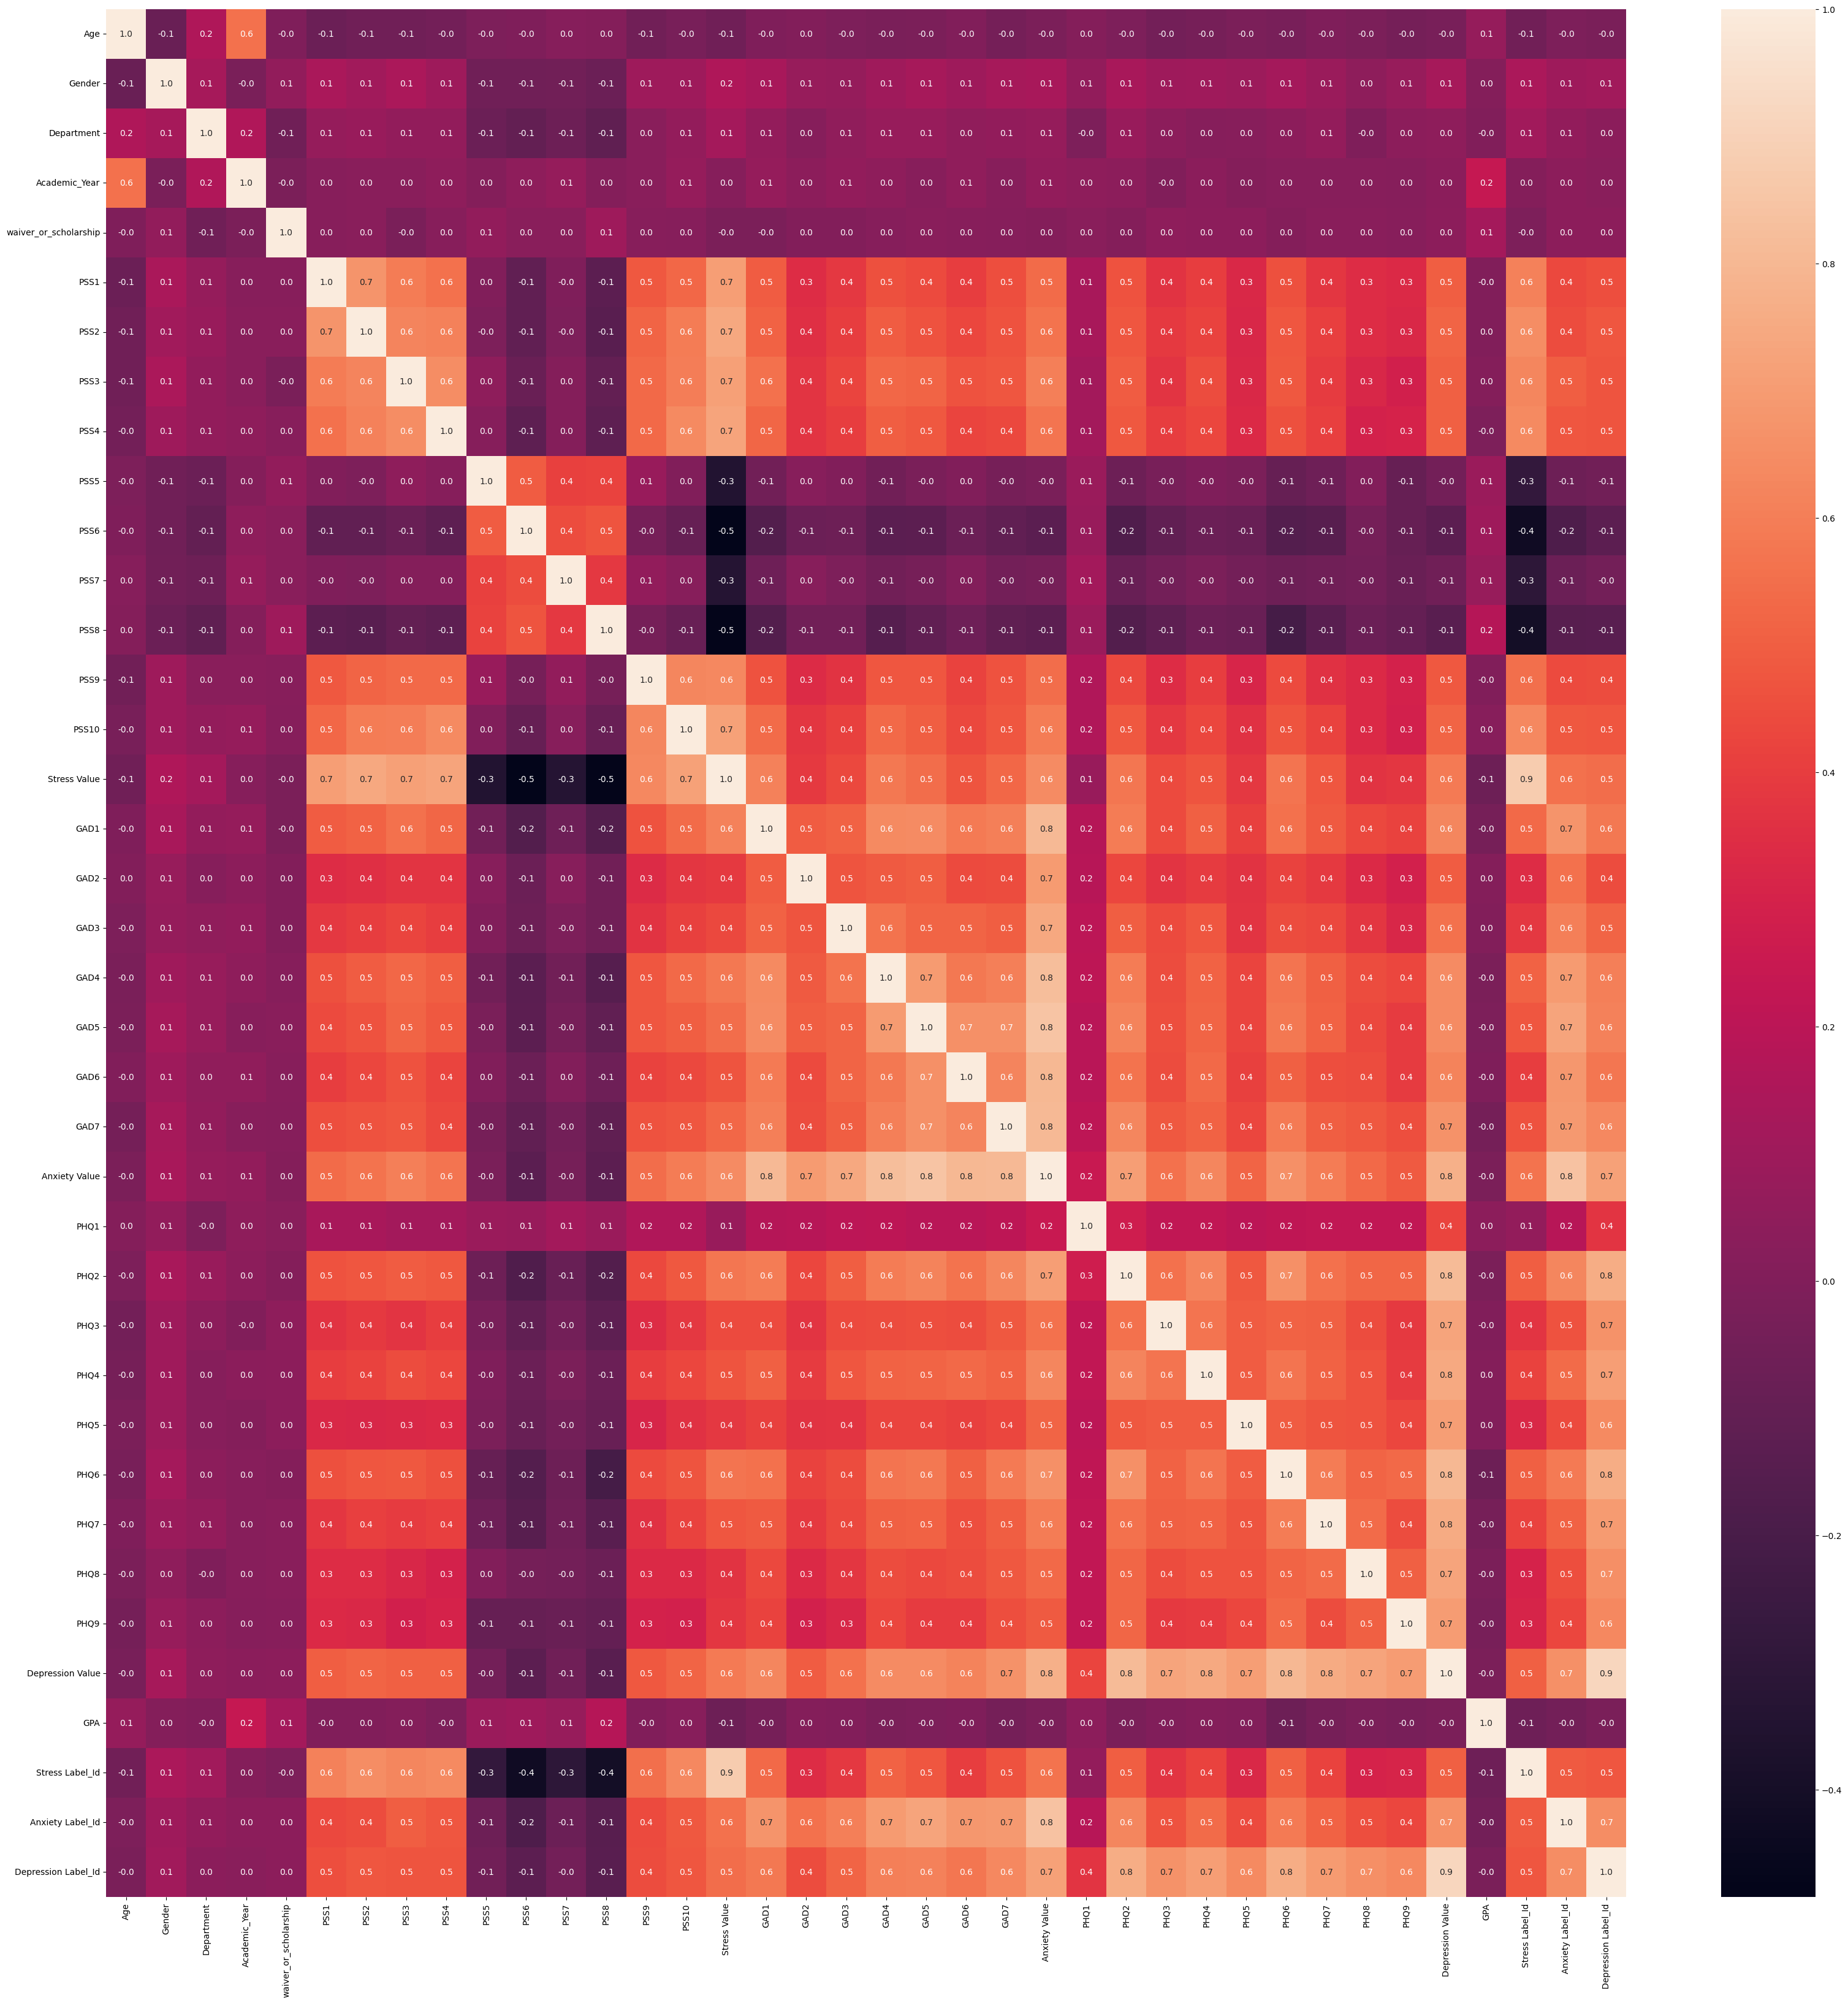

In [7]:
correlations = figshare_data.corr()
plt.figure(figsize=(40, 40))
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

Now I will remove features that either have weak correlation with the Stress level (Stress Label_Id), or those that would prevent the model to make the actual prediction:
- Age (Low correlation)
- Gender (Low correlation)
- Department (Low correlation)
- Academic Year (Low correlation)
- waiver_or_scholarship (Low correlation)
- GPA (Low correlation)
- Stress Value (this feature would prevent the actual prediction, as the label is categorized from this value)
- Anxiety Value (this feature would not make sense in the model, as I want to see how certain questions of the survey affect the stress level)
- Depression Value (this feature would not make sense in the model, as I want to see how certain questions of the survey affect the stress level)
- Anxiety Label_Id (this label is not needed as I have removed the value it is categorized from)
- Depression Label_Id (this label is not needed as I have removed the value it is categorized from)

In [8]:
figshare_data.drop(["Age", "Gender", "Department", "Academic_Year", "waiver_or_scholarship", "GPA", 'Stress Value', 'Anxiety Value', 'Depression Value', 'Anxiety Label_Id', 'Depression Label_Id'], axis=1, inplace=True)
figshare_data.head()

PSS1  PSS2  PSS3  PSS4  PSS5  PSS6  PSS7  PSS8  PSS9  PSS10  ...  PHQ1  \
0     3     4     3     2     2     1     2     2     4      4  ...     2   
1     3     3     4     2     3     2     2     2     2      3  ...     3   
2     0     0     0     0     0     1     0     0     0      0  ...     0   
3     3     1     2     1     4     3     2     2     3      2  ...     2   
4     4     4     4     2     2     2     0     2     4      4  ...     1   

   PHQ2  PHQ3  PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9  Stress Label_Id  
0     2     3     2     2     2     2     3     2                2  
1     2     2     2     2     2     2     2     2                1  
2     0     0     0     0     0     0     0     0                1  
3     1     2     1     2     1     2     2     1                1  
4     3     3     3     1     3     0     3     3                2  

[5 rows x 27 columns]

As the data is standartized, I will not look for any outliers

In [9]:
figshare_data.to_csv('figshare-data-high-corr', index=False)

figshare_data_high_corr = pd.read_csv('figshare-data-high-corr')
figshare_data_high_corr.head()

PSS1  PSS2  PSS3  PSS4  PSS5  PSS6  PSS7  PSS8  PSS9  PSS10  ...  PHQ1  \
0     3     4     3     2     2     1     2     2     4      4  ...     2   
1     3     3     4     2     3     2     2     2     2      3  ...     3   
2     0     0     0     0     0     1     0     0     0      0  ...     0   
3     3     1     2     1     4     3     2     2     3      2  ...     2   
4     4     4     4     2     2     2     0     2     4      4  ...     1   

   PHQ2  PHQ3  PHQ4  PHQ5  PHQ6  PHQ7  PHQ8  PHQ9  Stress Label_Id  
0     2     3     2     2     2     2     3     2                2  
1     2     2     2     2     2     2     2     2                1  
2     0     0     0     0     0     0     0     0                1  
3     1     2     1     2     1     2     2     1                1  
4     3     3     3     1     3     0     3     3                2  

[5 rows x 27 columns]

In [10]:
features = ["PSS1", "PSS2", "PSS3", "PSS4", "PSS5", "PSS6", "PSS7", "PSS8", "PSS9", "PSS10", "GAD1", "GAD2", "GAD3", "GAD4", "GAD5", "GAD6", "GAD7", "PHQ1", "PHQ2", "PHQ3", "PHQ4", "PHQ5", "PHQ6", "PHQ7", "PHQ8", "PHQ9"]
target = "Stress Label_Id"

X = figshare_data_high_corr[features]
y = figshare_data_high_corr[target]

#### Train/test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 2028 observations, of which 1622 are now in the train set, and 406 in the test set.


### Decision Tree Model

#### Modelling

I have chatted a bit with Perplexity ai, in order to choose a correct classification model, and from it I have learnt that DecisionTreeClassifier is good for my situation, as it is robust in handling correlated features (I have left the answers of the survey as even though they don't have very strong correlation to my target variable, but they do have strong correlation with features that do have a strong correlation with Stress Label_Id)

In [12]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8497536945812808


Feature importance

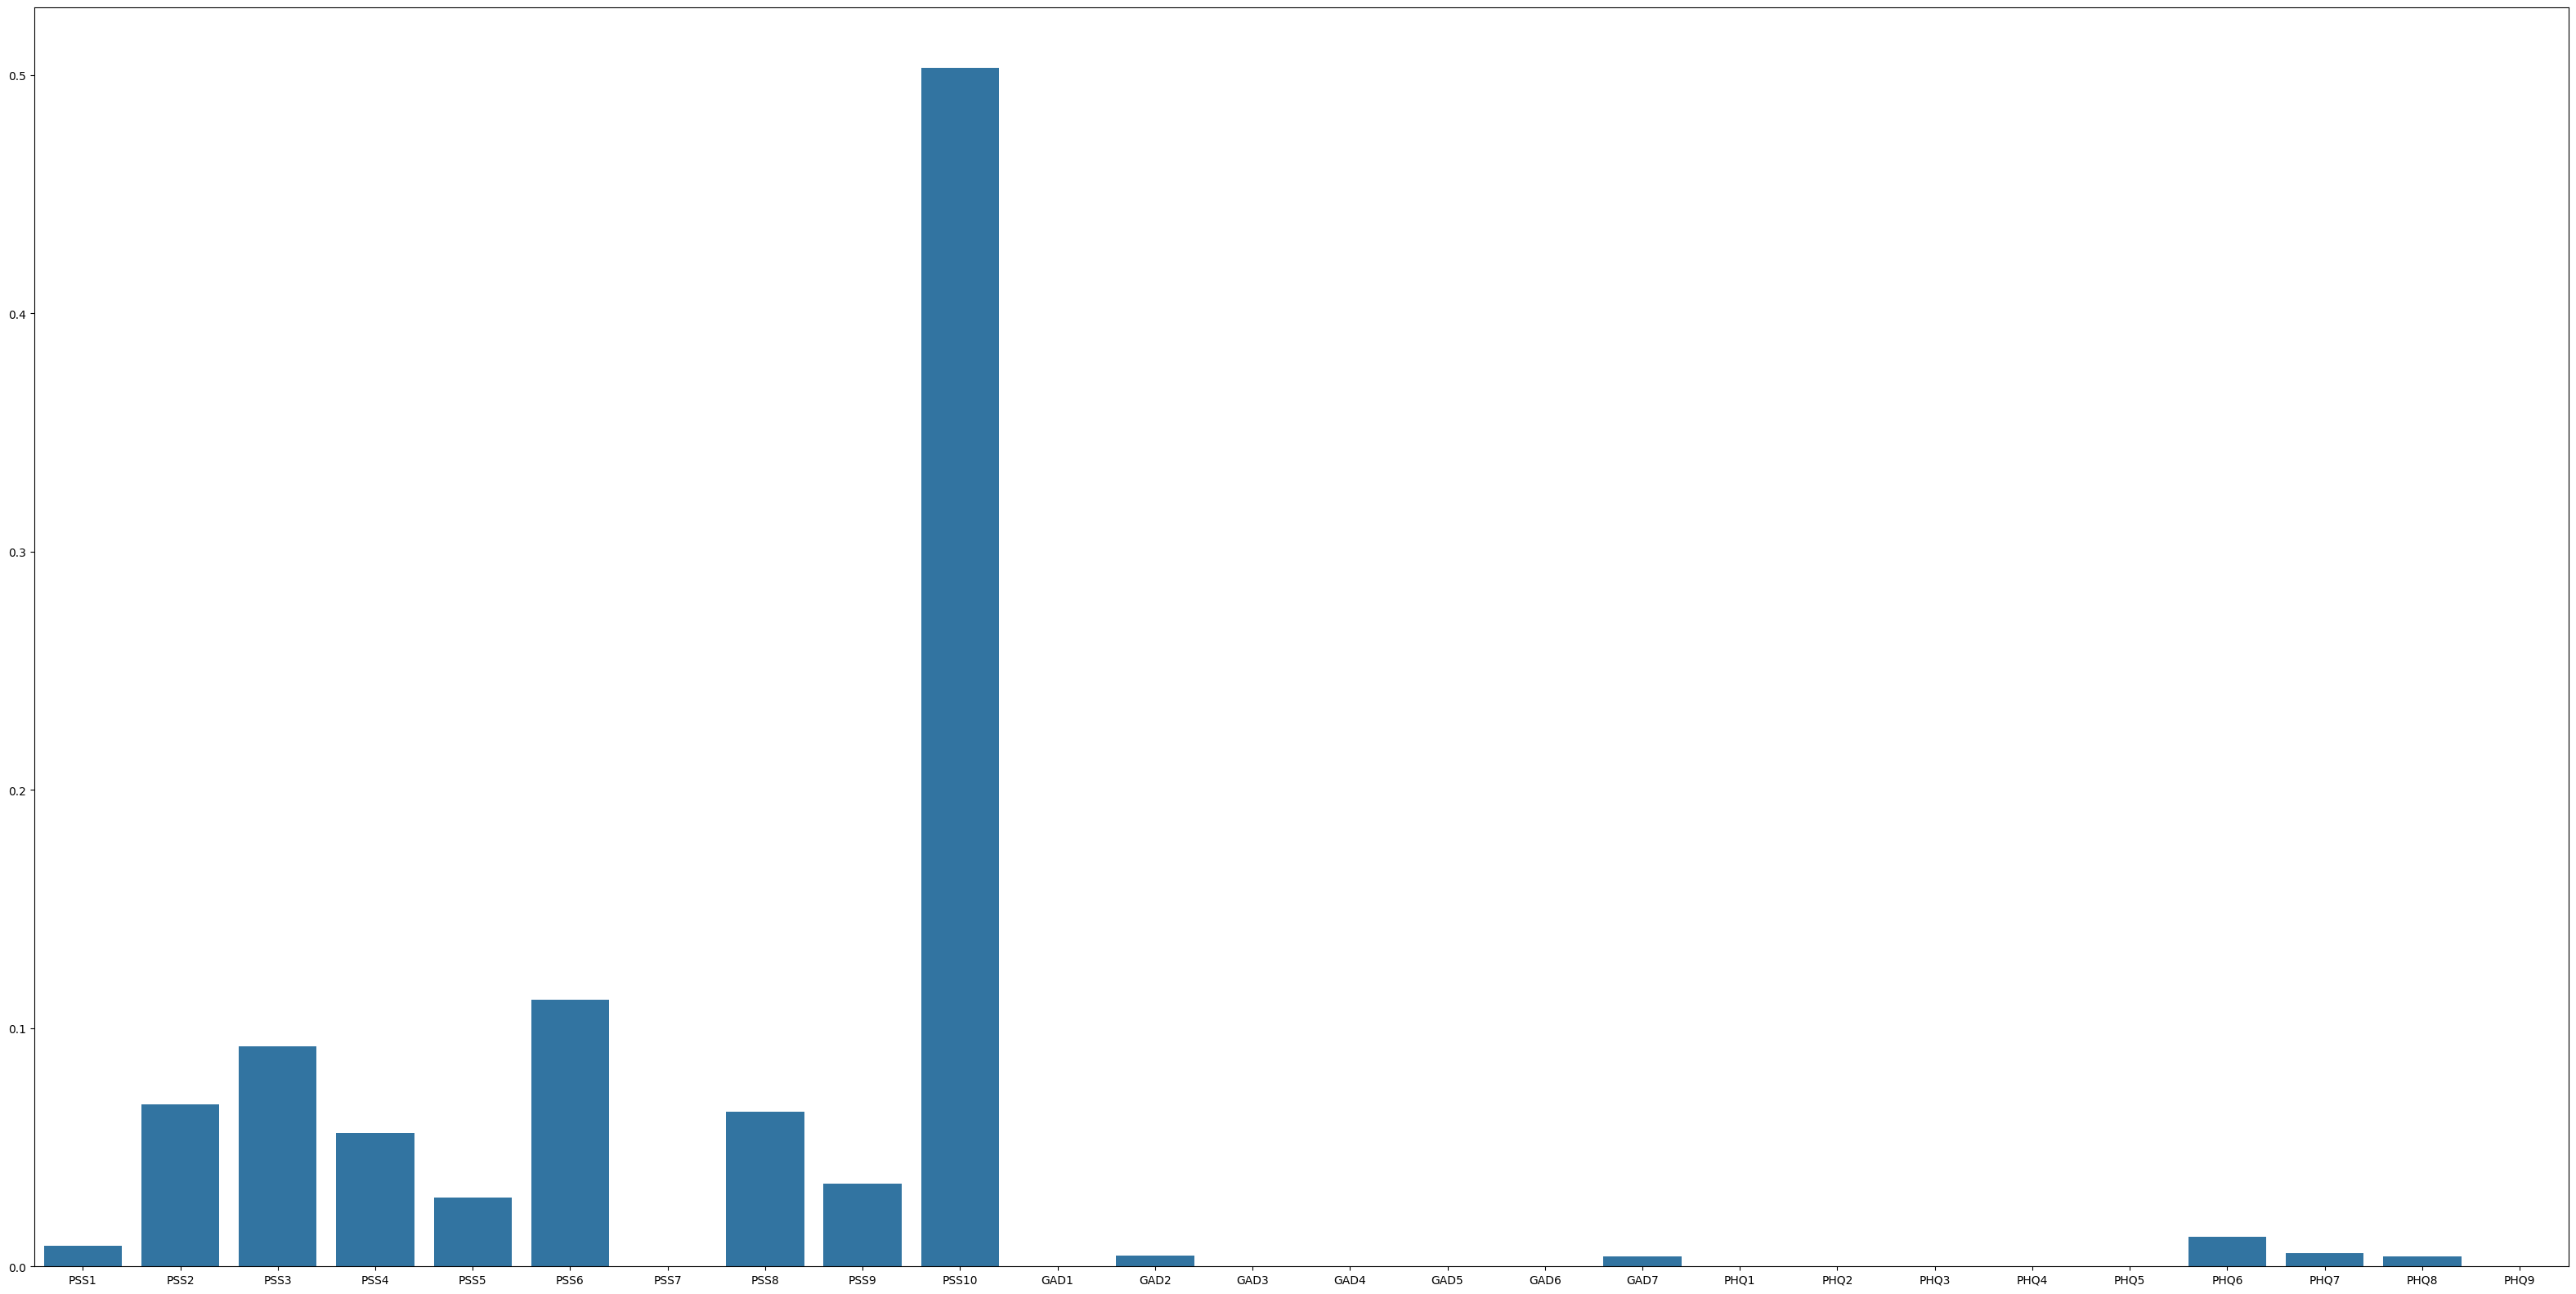

In [13]:
plt.figure(figsize=(40, 20))
plot = sns.barplot(y=model.feature_importances_, x=features)
plt.show()

Apparently, the calculated Stress Value is the one having the greatest influence on the Stress Label (correlation is 0.9), which is understandable.

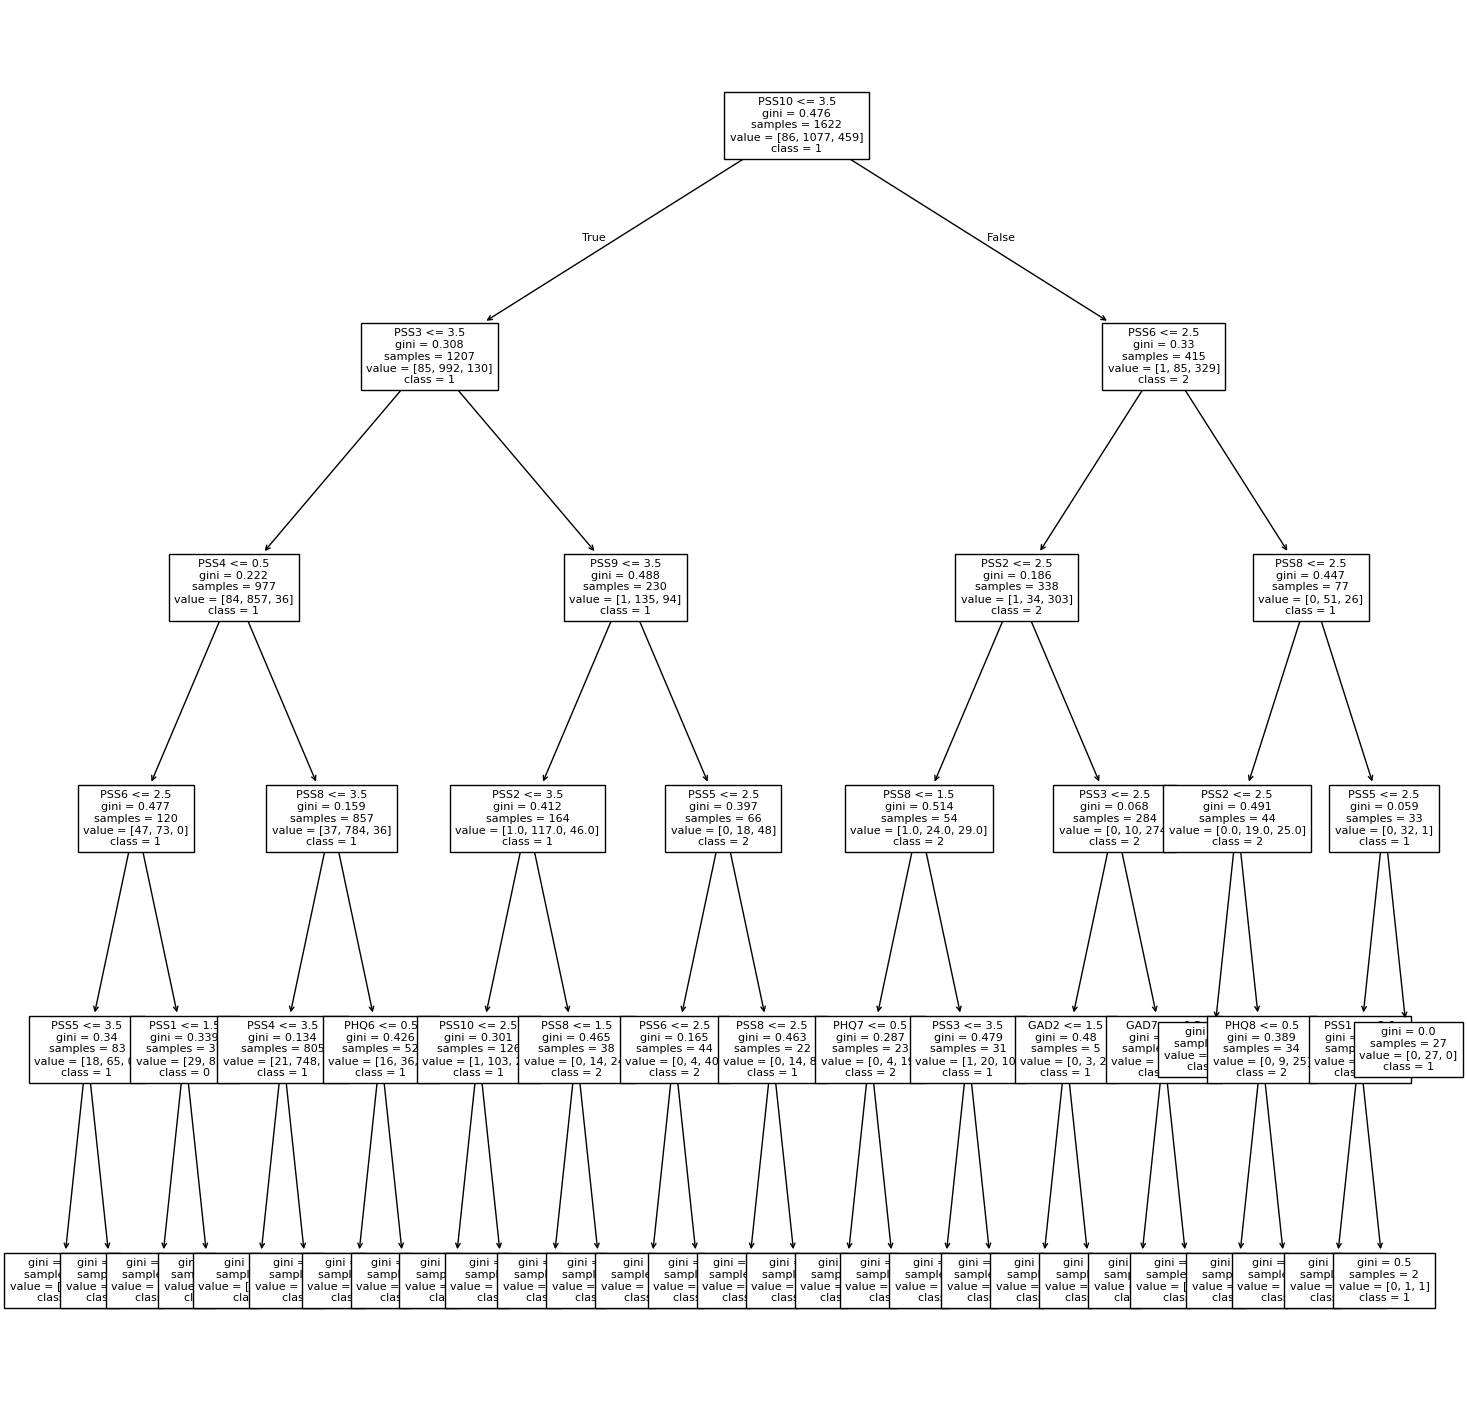

In [14]:
target_names = ["0", "1", "2", "3", "4"]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=8, feature_names=features, class_names=target_names)
plt.show()

In [15]:
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        29
           1       0.84      0.96      0.90       271
           2       0.88      0.70      0.78       106

    accuracy                           0.85       406
   macro avg       0.91      0.67      0.73       406
weighted avg       0.86      0.85      0.84       406



I think that the evaluation of this model would not be relevant, as because of the correlation between Stress Value and the Stress Label is 0.9, the DecisionTreeClassifier only takes this feature for prediction, no matter how I change the hyperparameters. A good idea would be to try to use another classifier model

### Support Vector Classification Model

#### Preprocessing

I will remove unnecessary features to avoid noise in the model

In [16]:
features = ["PSS1", "PSS2", "PSS3", "PSS4", "PSS5", "PSS6", "PSS7", "PSS8", "PSS9", "PSS10", "GAD1", "GAD2", "GAD3", "GAD4", "GAD5", "GAD6", "GAD7", "PHQ1", "PHQ2", "PHQ3", "PHQ4", "PHQ5", "PHQ6", "PHQ7", "PHQ8", "PHQ9"]
target = "Stress Label_Id"

X = figshare_data_high_corr[features]
y = figshare_data_high_corr[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 2028 observations, of which 1622 are now in the train set, and 406 in the test set.


#### Modelling

I will try to use different kernels to see the difference in the accuracy

In [18]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9901477832512315


In [19]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.958128078817734


The linear kernel has accuracy of 100%, which means that the data can be easily separated linearly. The polynomial kernel shows accuracy of 98%

I think that the metrics in the dataset (PSS, GAD, PHQ) provide useful information, and would be a good basis for my model but other features can be added.

## Kaggle Student Attitude and Behavior

The dataset comes from https://www.kaggle.com/datasets/susanta21/student-attitude-and-behavior?resource=download. This dataset contains information collected from university students (India) through a Google form. 

I know that using Kaggle as a data source is not a good idea, but this was taken for research purposes

### Data Provisioning

In [20]:
attitude_data = pd.read_csv('kaggle-student-attitude-and-behavior/Student Attitude and Behavior.csv')
attitude_data.head()

Certification Course  Gender Department  Height(CM)  Weight(KG)  10th Mark  \
0                   No    Male        BCA       100.0        58.0       79.0   
1                   No  Female        BCA        90.0        40.0       70.0   
2                  Yes    Male        BCA       159.0        78.0       71.0   
3                  Yes  Female        BCA       147.0        20.0       70.0   
4                   No    Male        BCA       170.0        54.0       40.0   

   12th Mark  college mark        hobbies daily studing time  \
0       64.0          80.0    Video Games      0 - 30 minute   
1       80.0          70.0         Cinema     30 - 60 minute   
2       61.0          55.0         Cinema         1 - 2 Hour   
3       59.0          58.0  Reading books         1 - 2 Hour   
4       65.0          30.0    Video Games     30 - 60 minute   

  prefer to study in  salary expectation Do you like your degree?  \
0            Morning               40000                       No   
1            Morning               15000                      Yes   
2            Anytime               13000                      Yes   
3            Anytime             1500000                       No   
4            Morning               50000                      Yes   

  willingness to pursue a career based on their degree   social medai & video  \
0                                                50%            1.30 - 2 hour   
1                                                75%            1 - 1.30 hour   
2                                                50%         More than 2 hour   
3                                                50%            1.30 - 2 hour   
4                                                25%            1.30 - 2 hour   

  Travelling Time  Stress Level  Financial Status part-time job  
0  30 - 60 minutes           Bad              Bad            No  
1   0 - 30 minutes           Bad              Bad            No  
2  30 - 60 minutes         Awful              Bad            No  
3   0 - 30 minutes           Bad             good            No  
4  30 - 60 minutes          Good             good            No

As a part of data provisioning process I will remove the 10th and 12th Mark, as they do not provide any useful information to me, along with height and weight, as I consider these parameters out of the scope.

In [21]:
attitude_data.drop(["Height(CM)", "Weight(KG)", "10th Mark", "12th Mark"], axis=1, inplace=True)
attitude_data.sample(5)

Certification Course  Gender Department  college mark        hobbies  \
179                  Yes  Female   Commerce          70.0         Cinema   
18                    No    Male        BCA          60.0         Cinema   
12                   Yes  Female        BCA          80.0  Reading books   
141                  Yes    Male        BCA          65.0         Sports   
178                  Yes  Female   Commerce          80.0         Cinema   

    daily studing time prefer to study in  salary expectation  \
179         1 - 2 Hour            Morning              120000   
18       0 - 30 minute            Anytime               30000   
12      30 - 60 minute            Morning               18000   
141     30 - 60 minute            Morning               20000   
178         1 - 2 Hour            Anytime               10000   

    Do you like your degree?  \
179                      Yes   
18                       Yes   
12                       Yes   
141                      Yes   
178                      Yes   

    willingness to pursue a career based on their degree    \
179                                                50%       
18                                                100%       
12                                                 75%       
141                                                50%       
178                                                50%       

    social medai & video Travelling Time  Stress Level  Financial Status  \
179        1 - 1.30 hour   0 - 30 minutes          Good              Bad   
18         1 - 30 Minute    1 - 1.30 hour           Bad              Bad   
12         1 - 30 Minute  30 - 60 minutes           Bad             good   
141       30 - 60 Minute   0 - 30 minutes          Good             good   
178       30 - 60 Minute  30 - 60 minutes           Bad            Awful   

    part-time job  
179            No  
18             No  
12             No  
141            No  
178            No

### Preprocessing

I will have to turn the values of some columns to numeric:
- Certification Course - Indicates whether the student has completed any certification course or not.(0 or 1)
- Gender - (0 or 1, in this case)
- Department - map each department to a numeric value
- Hobbies - map each hobby to a numeric value
- Daily studying time - transform into minutes
- Prefer to study in - map each time of the day to numeric value
- Do you like your degree? - (0 or 1)
- willingness to pursue a career based on their degree - remove % sign
- social media & video - transform into minutes
- Travelling Time - The time it takes for the student to commute or travel to their educational institution (transform into minutes)
- Stress Level - map each level to a numeric value
- Financial status 
- part time job - 0 or 1

In [22]:
unique_data = attitude_data['social medai & video'].unique()
unique_data

array(['1.30 - 2 hour', '1 - 1.30 hour', 'More than 2 hour',
       '30 - 60 Minute', '1 - 30 Minute', '0 Minute'], dtype=object)

In [23]:
attitude_data["Certification Course"] = attitude_data["Certification Course"].map({"No":0,"Yes":1}).astype(int)
attitude_data["Gender"] = attitude_data["Gender"].map({"Male":0, "Female":1}).astype(int)
attitude_data["Department"] = attitude_data["Department"].map({"BCA":0, "Commerce":1, "B.com Accounting and Finance ":2, "B.com ISM":3}).astype(int)
attitude_data["hobbies"] = attitude_data["hobbies"].map({"Video Games":0, "Cinema":1, "Reading books":2, "Sports":3}).astype(int)

# function to transform daily studying time into minutes
def convert_studying_time_to_minutes(time):
    time = time.lower().strip() 
    if "minute" in time:
        time = time.replace(" minutes", "").replace(" minute", "")
        start, end = map(int, time.split(" - "))
        return (start + end) / 2
    
    elif "hour" in time:
        time = time.replace(" hours", "").replace(" hour", "")
        
        if "more than" in time:
            return int(time.replace("more than ", "")) * 60

        if " - " in time:
            start, end = map(int, time.split(" - "))
            return (start + end) / 2 * 60
        
        return int(time) * 60

    return None 

attitude_data["daily studing time"] = attitude_data["daily studing time"].apply(convert_studying_time_to_minutes)
attitude_data["daily studing time"] = attitude_data["daily studing time"].astype(int)

attitude_data["prefer to study in"] = attitude_data["prefer to study in"].map({"Morning":0, "Anytime":1, "Night":2}).astype(int)

attitude_data.rename(columns={"Do you like your degree?": "Degree satisfaction"}, inplace=True)
attitude_data["Degree satisfaction"] = attitude_data["Degree satisfaction"].map({"Yes":0, "No":1}).astype(int)

attitude_data["Career Pursuit"] = attitude_data["willingness to pursue a career based on their degree  "].str.replace("%","")
attitude_data["Career Pursuit"] = attitude_data["Career Pursuit"].astype(int)
attitude_data.drop("willingness to pursue a career based on their degree  ", axis=1, inplace=True)

# function to transform time on social media into minutes
def convert_social_media_time_to_minutes(time):
    time = time.lower().strip()
    if "minute" in time:
        time = time.replace(" minutes", "").replace(" minute", "")
        if " - " in time:
            start, end = map(int, time.split(" - "))
            return (start + end) / 2
        return int(time)

    elif "hour" in time:
        time = time.replace(" hours", "").replace(" hour", "").replace("more than ", "")
        
        if " - " in time:
            start, end = time.split(" - ")
            start = float(start)
            end = float(end)
            return (start + end) / 2 * 60
        
        return float(time) * 60

    return None

attitude_data["time on social media"] = attitude_data["social medai & video"].apply(convert_social_media_time_to_minutes)
attitude_data["time on social media"] = attitude_data["time on social media"].astype(int)
attitude_data.drop("social medai & video", axis=1, inplace=True)

# function to transform traveling time into minutes
def convert_traveling_time_to_minutes(time):
    time = time.lower().strip()
    if "minutes" in time or "minute" in time:
        time = time.replace(" minutes", "").replace(" minute", "")
        start, end = map(int, time.split(" - "))
        return (start + end) / 2 

    elif "hour" in time:
        time = time.replace(" hours", "").replace(" hour", "").replace("more than ", "")
        
        if " - " in time:
            start, end = time.split(" - ")
            start = float(start.replace(".", ""))
            end = float(end.replace(".", ""))
            return (start + end) / 2 * 60 
        
        return float(time.replace(".", "")) * 60 

    return None 

attitude_data["Travelling Time "] = attitude_data["Travelling Time "].apply(convert_traveling_time_to_minutes)
attitude_data["Travelling Time "] = attitude_data["Travelling Time "].astype(int)

attitude_data["Stress Level "] = attitude_data["Stress Level "].map({'Awful':0, 'Bad':1, 'Good':2, 'fabulous':3}).astype(int)
attitude_data["Financial Status"] = attitude_data["Financial Status"].map({'Awful':0, 'Bad':1, 'good':2, 'Fabulous':3}).astype(int)
attitude_data["part-time job"] = attitude_data["part-time job"].map({"No":0, "Yes":1}).astype(int)  

Sample the data to see if everything is okay

In [24]:
attitude_data.sample(10)

Certification Course  Gender  Department  college mark  hobbies  \
5                       1       1           0          70.0        1   
189                     0       0           3          70.0        2   
97                      1       0           0          80.0        3   
84                      1       0           0          70.0        2   
56                      1       1           1          80.0        2   
145                     1       0           2          85.0        3   
52                      0       0           2          75.0        2   
200                     1       0           3          50.0        2   
174                     1       0           1          50.0        1   
73                      1       0           0          73.3        3   

     daily studing time  prefer to study in  salary expectation  \
5                    45                   2               20000   
189                  90                   0               12000   
97                  150                   2               25000   
84                  210                   1                  21   
56                  150                   0               15000   
145                 240                   1              100000   
52                  240                   1               15000   
200                  90                   1               50000   
174                  45                   0               25000   
73                   15                   1               50000   

     Degree satisfaction  Travelling Time   Stress Level   Financial Status  \
5                      0                15              1                 2   
189                    0                15              2                 0   
97                     0              3930              2                 2   
84                     0                45              0                 2   
56                     0                15              3                 1   
145                    0              3960              3                 1   
52                     0                45              1                 2   
200                    0              3930              1                 2   
174                    0              3960              2                 1   
73                     0              3930              1                 2   

     part-time job  Career Pursuit  time on social media  
5                0              50                    45  
189              0              50                    15  
97               0              75                    45  
84               1             100                    45  
56               1             100                    15  
145              0             100                    45  
52               0             100                    99  
200              1              75                   120  
174              0               0                   120  
73               0              50                    45

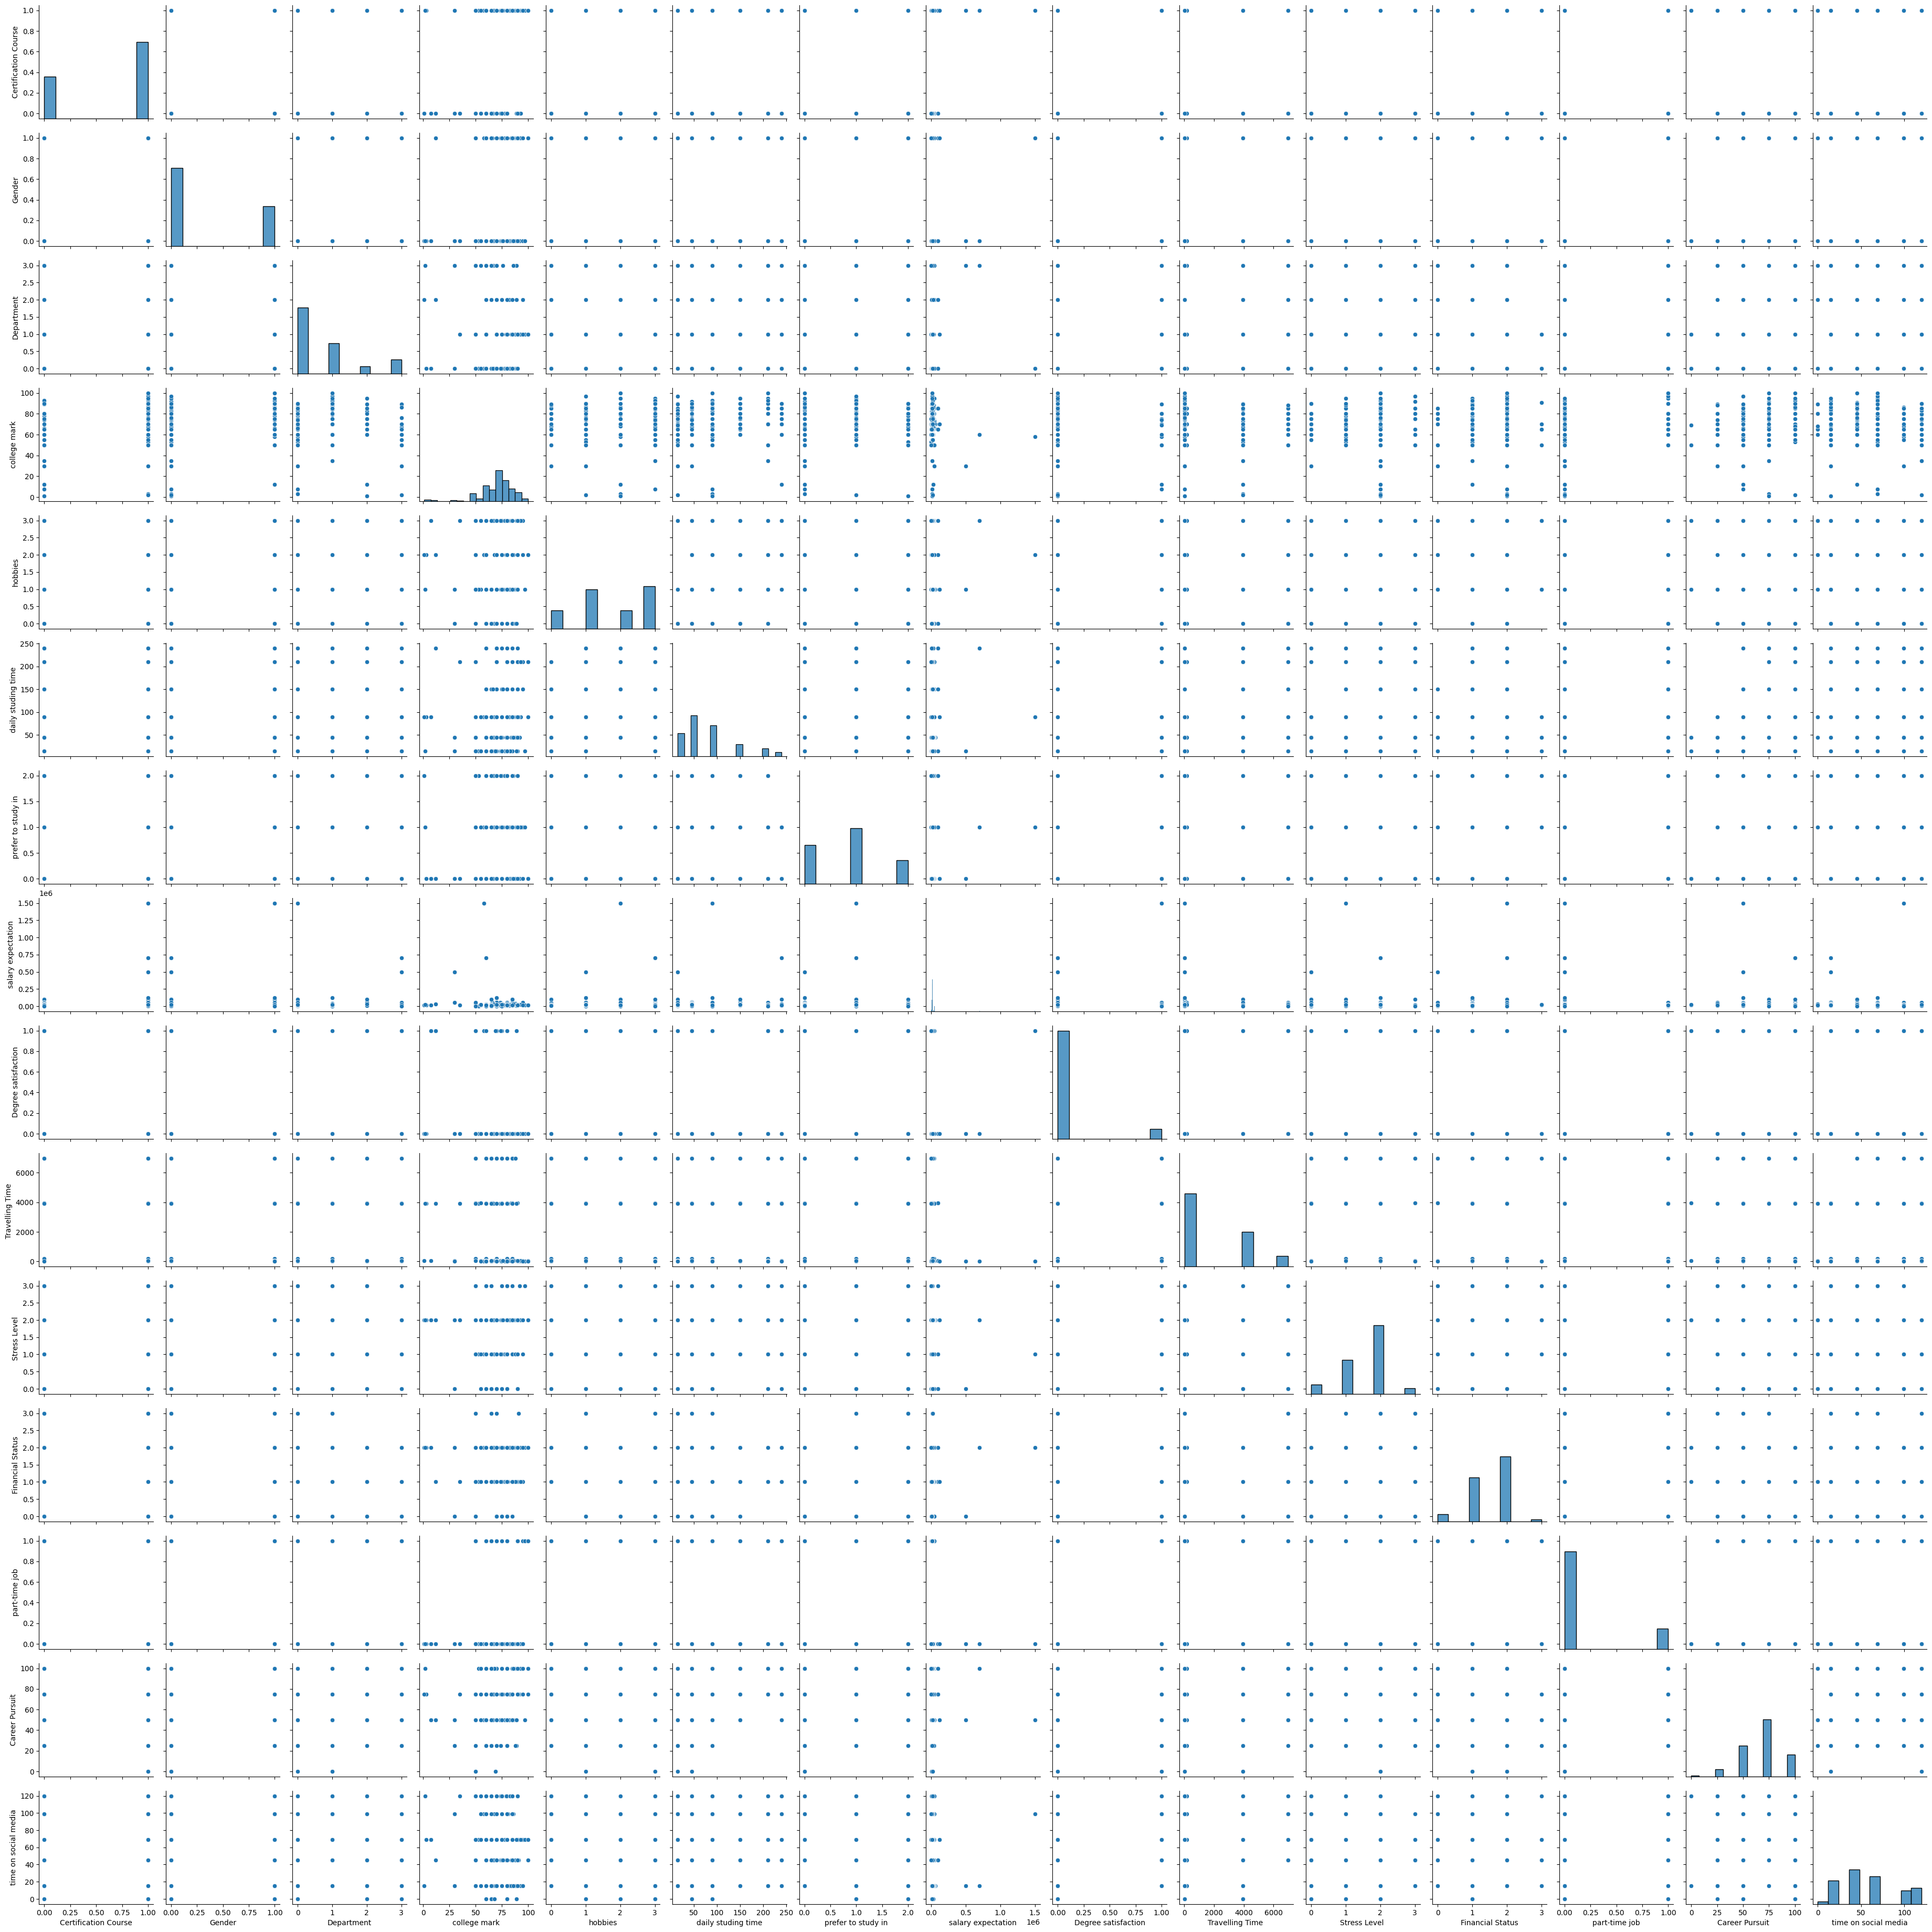

In [ ]:
sns.pairplot(attitude_data) 

#### Feature Selection

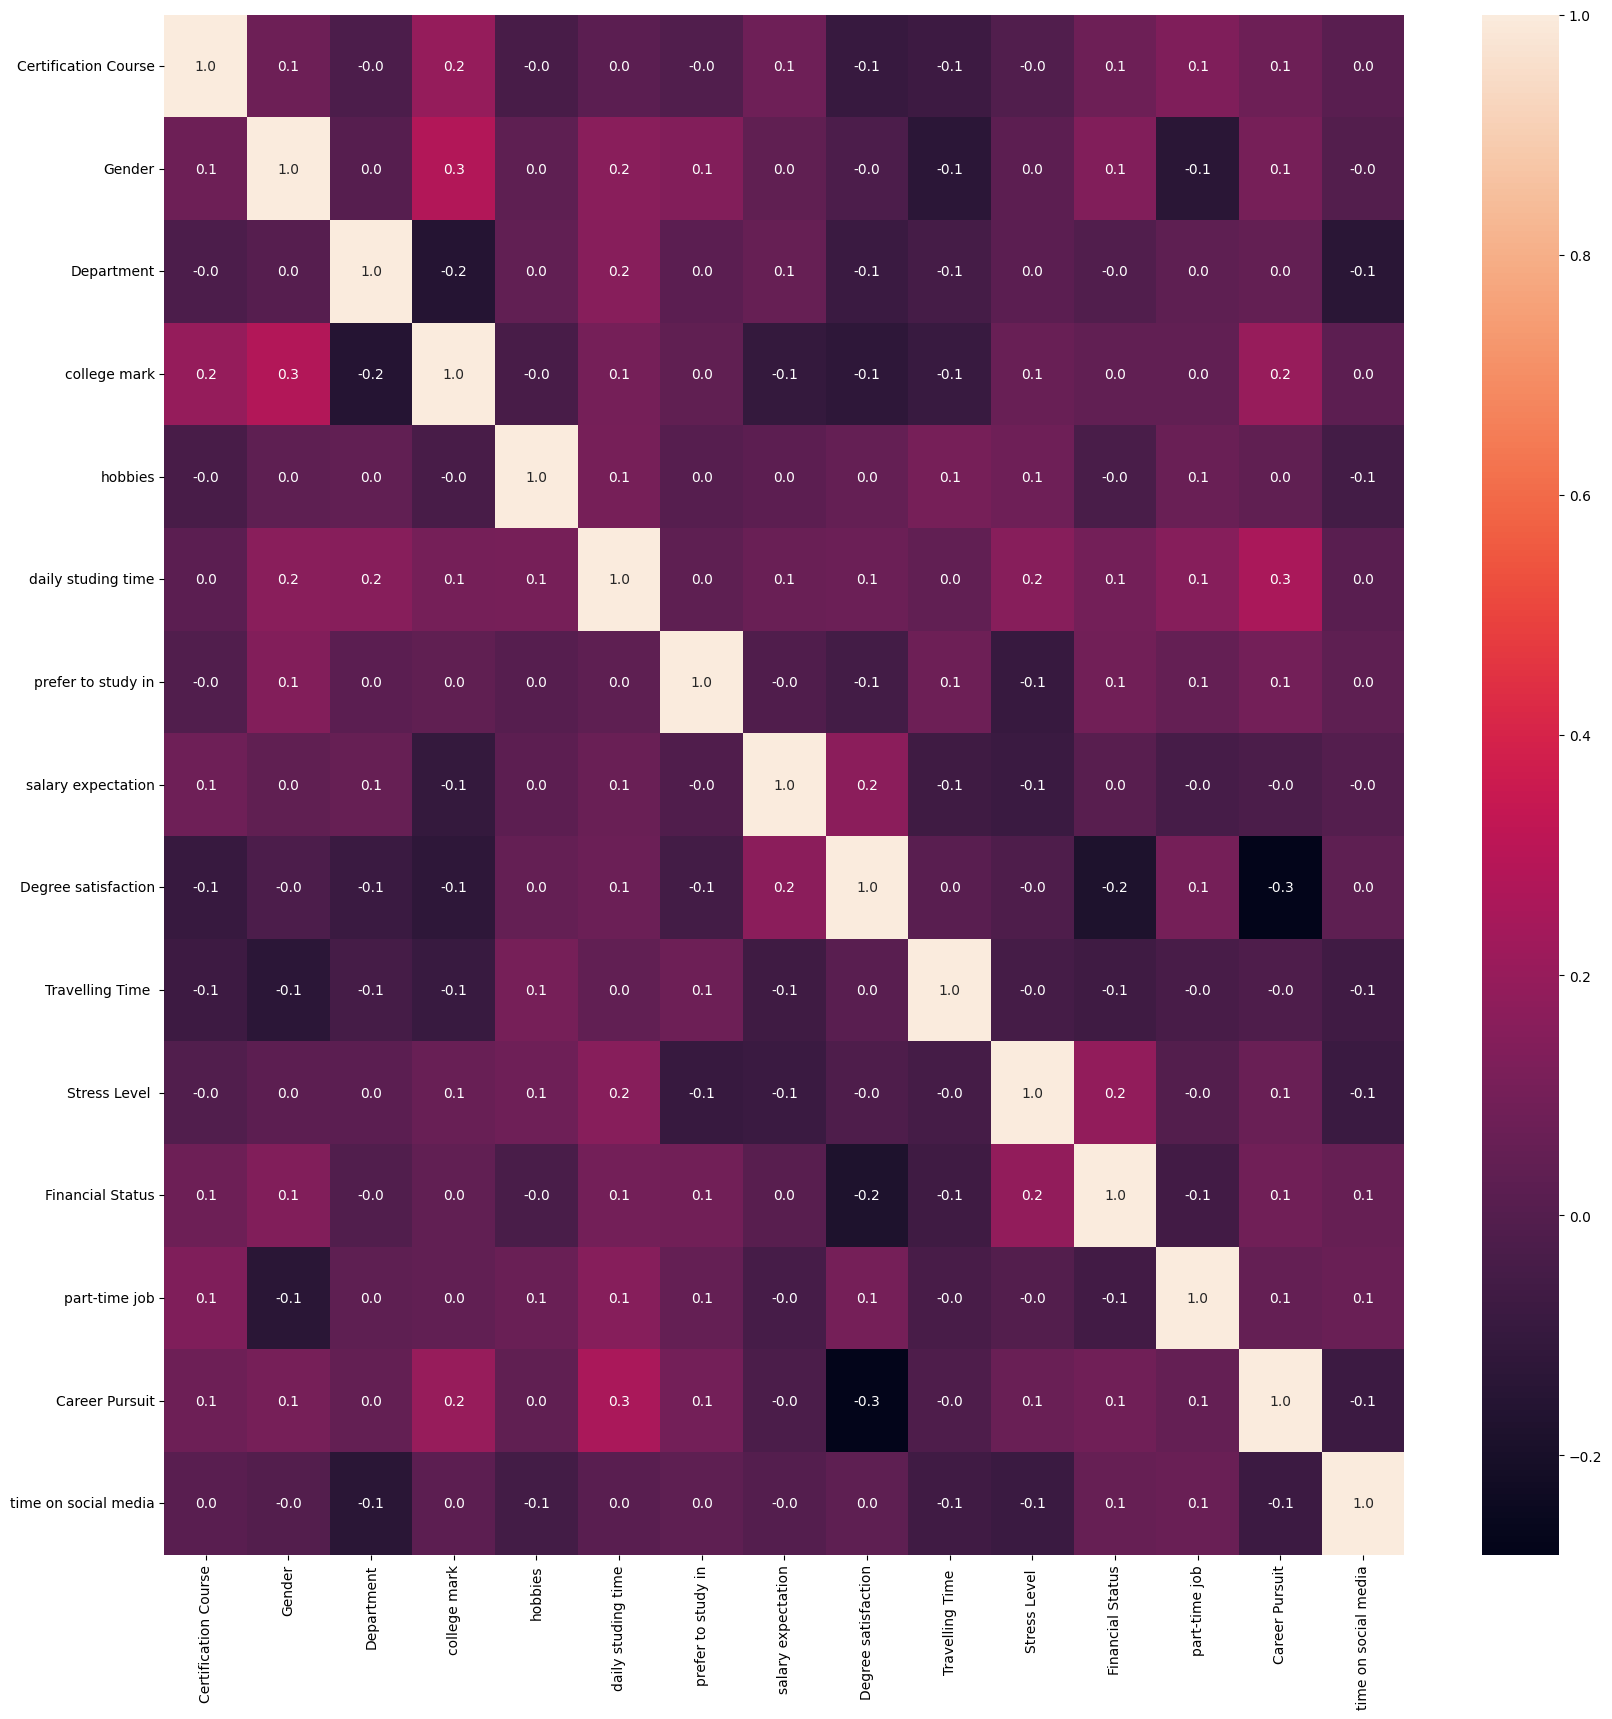

In [26]:
correlations = attitude_data.corr()
plt.figure(figsize=(20, 20))
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

The correlations between stress level and other features is usually not higher than 20%.

In [27]:
attitude_data.drop(["Certification Course", "Gender", "Department", "college mark", "prefer to study in", "Travelling Time "], axis=1, inplace=True)
attitude_data = attitude_data[['hobbies', 'salary expectation', 'Degree satisfaction', 'Financial Status', 'part-time job', 'Career Pursuit', 'daily studing time', 'time on social media', 'Stress Level ']]
attitude_data.to_csv('attitude-data-cleaned.csv', index=False)
attitude_data_cleaned = pd.read_csv('attitude-data-cleaned.csv')
attitude_data_cleaned.head()

hobbies  salary expectation  Degree satisfaction  Financial Status  \
0        0               40000                    1                 1   
1        1               15000                    0                 1   
2        1               13000                    0                 1   
3        2             1500000                    1                 2   
4        0               50000                    0                 2   

   part-time job  Career Pursuit  daily studing time  time on social media  \
0              0              50                  15                    99   
1              0              75                  45                    69   
2              0              50                  90                   120   
3              0              50                  90                    99   
4              0              25                  45                    99   

   Stress Level   
0              1  
1              1  
2              0  
3              1  
4              2

In [28]:
features = ['hobbies', 'salary expectation', 'Degree satisfaction', 'Financial Status', 'part-time job', 'Career Pursuit', 'daily studing time', 'time on social media']
target = 'Stress Level '

X = attitude_data_cleaned[features]
y = attitude_data_cleaned[target]

The idea behind these choices of the features is:
- hobbies - if a certain hobby of a student can cause stress in any way (bjj for example is a really hard sport for begginers, as for some period of time you can't do much (from personal experience))
- salary expectations - the lower the expected salary, the higher stress level
- Financial Status - can cause stress in every day life 
- part time job - a student can have hard time combining their work with studies
- career pursuit - if a student has chosen a profile that is not in their interest, but for a higher salary or just to have any kind of high education, this can cause stress
- time on social media - can make the stress level lower, as time spent on social media can let student forget about the stress with studies/work

#### Train/test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 235 observations, of which 188 are now in the train set, and 47 in the test set.


### Modelling

I will use decision tree classifier K-Nearest Neighbors classifier (as the dataset is small, so no overfitting and SVC takes forever to compute for some reason) to check which suits better

In [30]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.48936170212765956


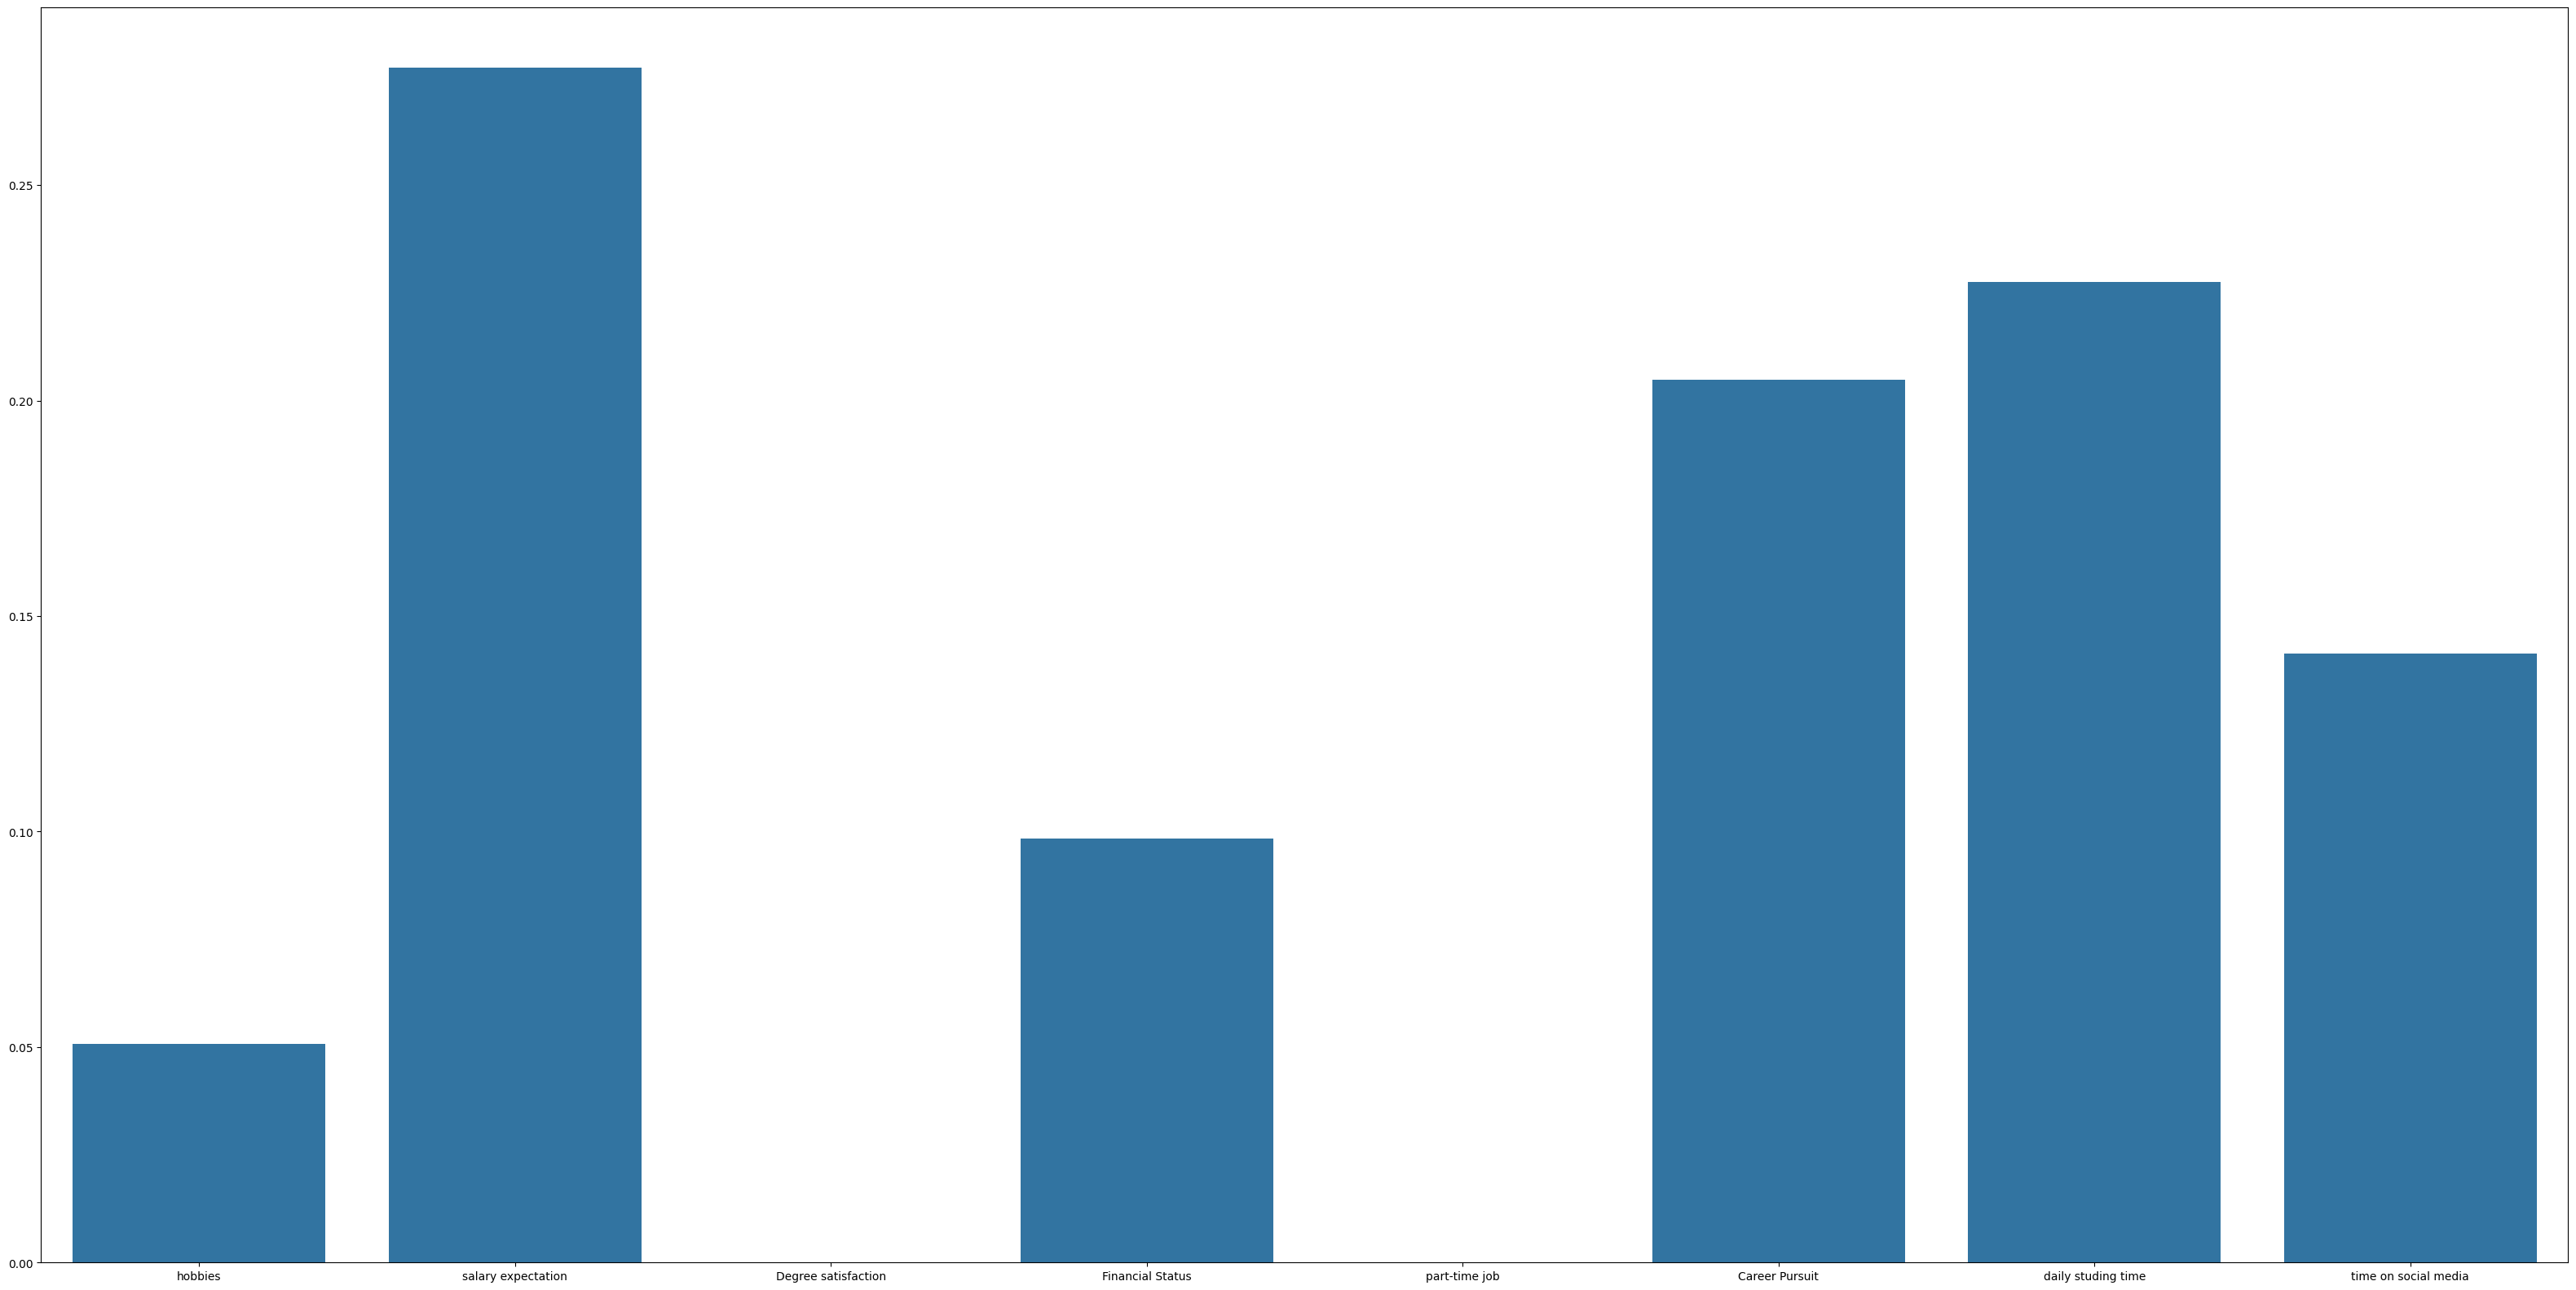

In [31]:
plt.figure(figsize=(40, 20))
plot = sns.barplot(y=model.feature_importances_, x=features)
plt.show()

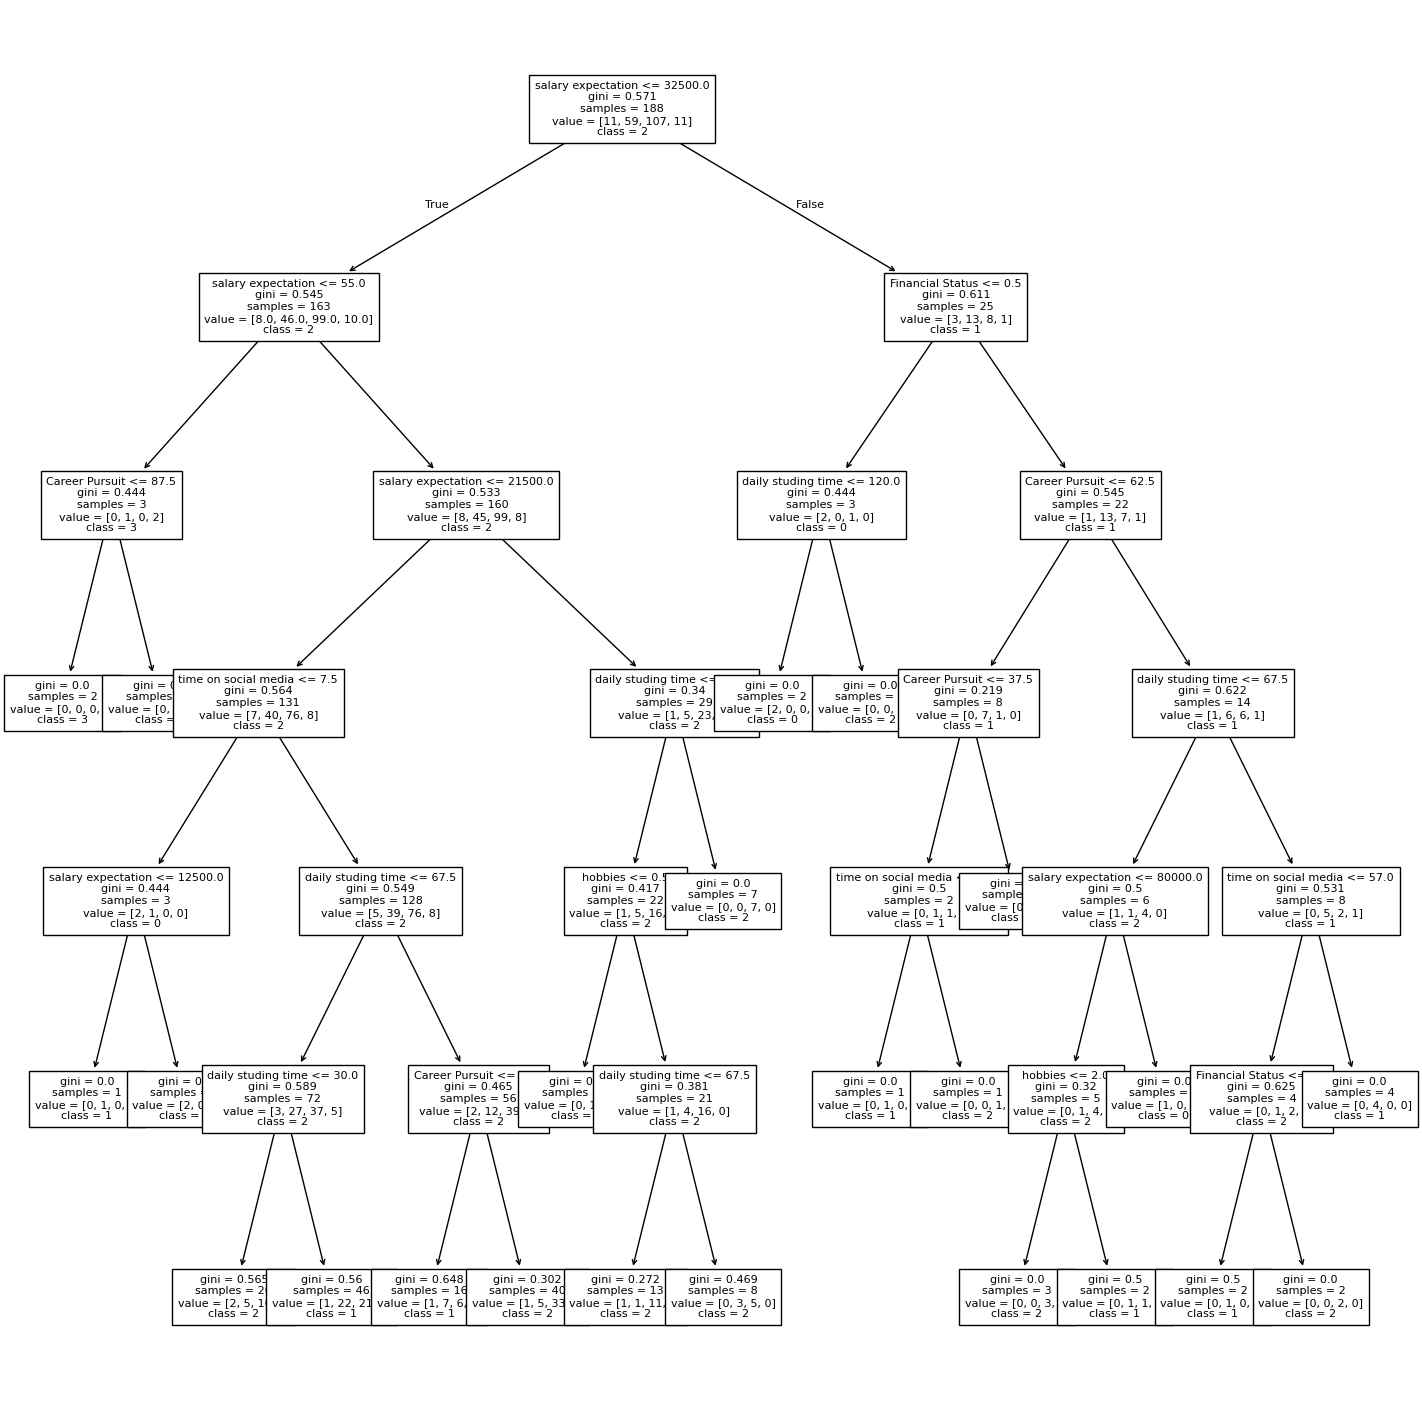

In [32]:
target_names = ["0", "1", "2", "3"]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=8, feature_names=features, class_names=target_names)
plt.show()

In [33]:
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.25      0.56      0.34         9
           2       0.75      0.60      0.67        30
           3       0.00      0.00      0.00         0

    accuracy                           0.49        47
   macro avg       0.25      0.29      0.25        47
weighted avg       0.53      0.49      0.49        47



c:\Users\ivanb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ivanb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ivanb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

The decision trees accuracy is 61%, which is relatively high. The precision and recall for stress level Awful and Fabulous is 0. I assume that because the dataset is small, the test set can be missing such values

In [34]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(pred, y_test)
print("Accuracy:", score)

Accuracy: 0.46808510638297873


In [35]:
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.19      0.33      0.24         9
           2       0.63      0.63      0.63        30

    accuracy                           0.47        47
   macro avg       0.27      0.32      0.29        47
weighted avg       0.44      0.47      0.45        47



The models accuracy is 49%, which is low. As the precision and recall of class 0 and 3 is 0%, my assumption about missing values is right

This model might not be too accurate because of a small and imbalanced dataset, but I have investigated a couple more features that would be relevant for my future iterations

## Mental Health and Lifestyle Dataset for Sentiment Analysis

The data comes from https://zenodo.org/records/14838680

"This dataset comprises 50,000 records capturing various mental health and lifestyle factors. It includes demographic details such as age, gender, occupation, and country, along with key mental health indicators like mental health condition status, severity, stress levels, consultation history, and medication usage. Additionally, it incorporates lifestyle variables such as sleep hours, work hours, physical activity, social media usage, and diet quality. The dataset also contains smoking and alcohol consumption habits, categorized into multiple levels to provide deeper insights. These attributes help in analyzing correlations between mental health and external factors, enabling researchers to develop predictive models for stress, anxiety, and overall well-being. This dataset is valuable for studies in mental health analytics, sentiment analysis, and public health research, offering insights into behavioral patterns and risk factors influencing mental health. It is designed for sentiment analysis and mental health prediction research"

### Data Provisioning

In [36]:
mental_health_data = pd.read_csv('mental-health-lifestyle-data/mental_health_data final data.csv')
mental_health_data.head()

User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8          74                        2                 3.4   
2          7.1          77                        9                 5.9   
3          6.9          57                        4                 5.4   
4          4.7          45                       10                 3.3   

  Diet_Quality   Smoking_Habit Alcohol_Consumption Medication_Usage  
0      Healthy  Regular Smoker     Regular Drinker              Yes  
1    Unhealthy    Heavy Smoker      Social Drinker               No  
2      Healthy    Heavy Smoker      Social Drinker               No  
3      Average  Regular Smoker     Regular Drinker               No  
4    Unhealthy  Regular Smoker         Non-Drinker              Yes

This dataset contains 50001 records in 17 columns. The data is not specificaly of students, but contains valueable features

In [37]:
mental_health_data.drop(['User_ID', 'Age', 'Country'], axis=1, inplace=True)
mental_health_data = mental_health_data[['Gender', 'Occupation', 'Mental_Health_Condition', 'Severity', 'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage', 'Stress_Level']]
mental_health_data.head()

Gender   Occupation Mental_Health_Condition Severity  \
0               Male    Education                     Yes      NaN   
1               Male  Engineering                      No      Low   
2  Prefer not to say        Sales                      No      NaN   
3         Non-binary  Engineering                      No   Medium   
4               Male           IT                     Yes      NaN   

  Consultation_History  Sleep_Hours  Work_Hours  Physical_Activity_Hours  \
0                  Yes          7.6          46                        8   
1                   No          6.8          74                        2   
2                  Yes          7.1          77                        9   
3                   No          6.9          57                        4   
4                  Yes          4.7          45                       10   

   Social_Media_Usage Diet_Quality   Smoking_Habit Alcohol_Consumption  \
0                 2.2      Healthy  Regular Smoker     Regular Drinker   
1                 3.4    Unhealthy    Heavy Smoker      Social Drinker   
2                 5.9      Healthy    Heavy Smoker      Social Drinker   
3                 5.4      Average  Regular Smoker     Regular Drinker   
4                 3.3    Unhealthy  Regular Smoker         Non-Drinker   

  Medication_Usage Stress_Level  
0              Yes          Low  
1               No          Low  
2               No       Medium  
3               No          Low  
4              Yes         High

I have removed columns representing user id, age and country, as they are out of the scope of my project. 
Columns I have kept for further investigation:
- Occupation - can influence stress level based on profecional requirements
- Mental Health Condition - shows if a person has any medical conditions
- Severity - severity of the medical condition
- Consultation History - indicates if the person has consulted a mental health professional
- Sleep Hours - how much time a person sleeps
- Work Hours - how much a person works (for my project goal is not applicable (Studying time would be better), but it would be nice to see the correlation between it and the Stress Level) 
- Physical Activity - indicates the number of hours spent on physical activities (usually reduces stress)
- Social Media Usage - average time spent on social media (I have already had such feature in the previous dataset, but it is good to see how it works in this one). High social media usage is linked to anxiety and depression
- Diet Quality - self reported data quality
- Smoking habit - smoking frequency classification. Smoking is associated with stress and depression
- Alcohol Consumption - Alcohol drinking frequency classification. High alcohol consumption is linked to mental health disorders
- Medication Usage - Whether the individual takes mental health-related medications
- Stress_Level

### Preprocessing

The data is well organized and structured, but there are some missing values and some values will have to be turned into numerical.

<Axes: >

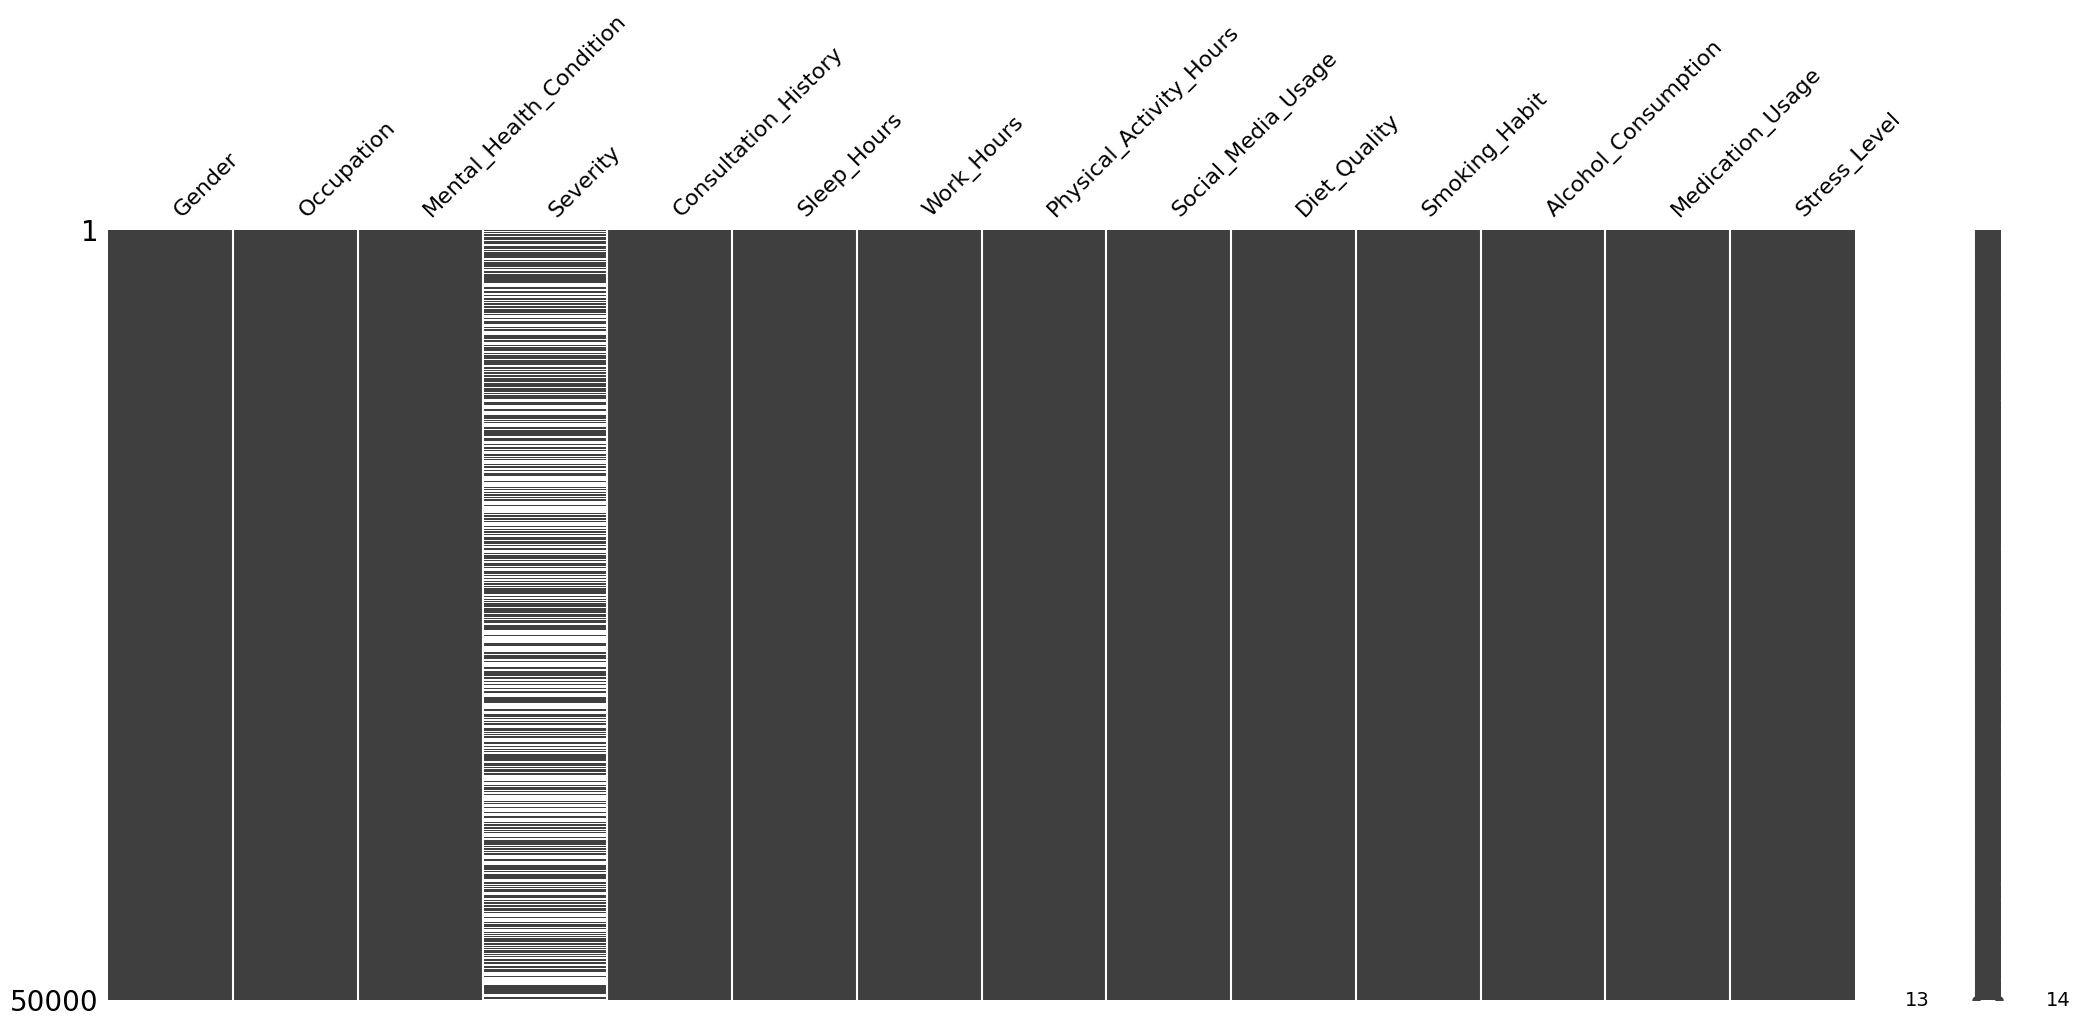

In [38]:
msno.matrix(mental_health_data) 

As the Severity column contains a lot of missing values, and there is no logical connection between the Mental Health Condition and Severity (in terms of the dataset), I will remove it.

In [39]:
mental_health_data.drop('Severity', axis=1, inplace=True)
mental_health_data.head()

Gender   Occupation Mental_Health_Condition  \
0               Male    Education                     Yes   
1               Male  Engineering                      No   
2  Prefer not to say        Sales                      No   
3         Non-binary  Engineering                      No   
4               Male           IT                     Yes   

  Consultation_History  Sleep_Hours  Work_Hours  Physical_Activity_Hours  \
0                  Yes          7.6          46                        8   
1                   No          6.8          74                        2   
2                  Yes          7.1          77                        9   
3                   No          6.9          57                        4   
4                  Yes          4.7          45                       10   

   Social_Media_Usage Diet_Quality   Smoking_Habit Alcohol_Consumption  \
0                 2.2      Healthy  Regular Smoker     Regular Drinker   
1                 3.4    Unhealthy    Heavy Smoker      Social Drinker   
2                 5.9      Healthy    Heavy Smoker      Social Drinker   
3                 5.4      Average  Regular Smoker     Regular Drinker   
4                 3.3    Unhealthy  Regular Smoker         Non-Drinker   

  Medication_Usage Stress_Level  
0              Yes          Low  
1               No          Low  
2               No       Medium  
3               No          Low  
4              Yes         High

Next, I will each column into numeric values:
- Gender - Male, Female, Non-binary, Prefer not to say
- Occupation - IT, Finance, Healthcare, Education, Engineering, Sales, Other
- Mental_Health_Condition - No, Yes
- Consultation History - No, Yes
- Diet_Quality - Unhealthy, Average, Healthy
- Smoking_Habit - Non-Smoker, Occasional Smoker, Regular Smoker, Heavy Smoker
- Alcohol_Consumption - Non-Drinker, Social Drinker, Regular Drinker, Heavy Drinker
- Medication_Usage - No, Yes
- Stress_Level - Low, Medium, High

In [40]:
mental_health_data['Gender'] = mental_health_data['Gender'].map({'Male': 0, 'Female': 1, 'Non-binary': 2, 'Prefer not to say': 3}).astype(int)
mental_health_data['Occupation'] = mental_health_data['Occupation'].map({'IT': 0, 'Finance': 1, 'Healthcare': 2, 'Education': 3, 'Engineering': 4, 'Sales': 5, 'Other': 6}).astype(int)
mental_health_data['Mental_Health_Condition'] = mental_health_data['Mental_Health_Condition'].map({'No': 0, 'Yes': 1}).astype(int)
mental_health_data['Consultation_History'] = mental_health_data['Consultation_History'].map({'No': 0, 'Yes': 1}).astype(int)
mental_health_data['Diet_Quality'] = mental_health_data['Diet_Quality'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2}).astype(int)
mental_health_data['Smoking_Habit'] = mental_health_data['Smoking_Habit'].map({'Non-Smoker': 0, 'Occasional Smoker': 1, 'Regular Smoker': 2, 'Heavy Smoker': 3}).astype(int)
mental_health_data['Alcohol_Consumption'] = mental_health_data['Alcohol_Consumption'].map({'Non-Drinker': 0, 'Social Drinker': 1, 'Regular Drinker': 2, 'Heavy Drinker': 3}).astype(int)
mental_health_data['Medication_Usage'] = mental_health_data['Medication_Usage'].map({'No': 0, 'Yes': 1}).astype(int)
mental_health_data['Stress_Level'] = mental_health_data['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
mental_health_data

Gender  Occupation  Mental_Health_Condition  Consultation_History  \
0           0           3                        1                     1   
1           0           4                        0                     0   
2           3           5                        0                     1   
3           2           4                        0                     0   
4           0           0                        1                     1   
...       ...         ...                      ...                   ...   
49995       3           3                        0                     1   
49996       1           6                        0                     1   
49997       3           3                        1                     0   
49998       3           6                        1                     0   
49999       0           4                        1                     0   

       Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0              7.6          46                        8                 2.2   
1              6.8          74                        2                 3.4   
2              7.1          77                        9                 5.9   
3              6.9          57                        4                 5.4   
4              4.7          45                       10                 3.3   
...            ...         ...                      ...                 ...   
49995          8.4          45                        4                 1.3   
49996          9.9          68                        6                 5.1   
49997          5.2          61                        6                 2.1   
49998          8.2          59                        0                 1.9   
49999          7.8          36                        9                 2.8   

       Diet_Quality  Smoking_Habit  Alcohol_Consumption  Medication_Usage  \
0                 2              2                    2                 1   
1                 0              3                    1                 0   
2                 2              3                    1                 0   
3                 1              2                    2                 0   
4                 0              2                    0                 1   
...             ...            ...                  ...               ...   
49995             0              2                    2                 1   
49996             2              1                    1                 1   
49997             1              0                    3                 0   
49998             2              1                    2                 1   
49999             0              0                    1                 1   

       Stress_Level  
0                 0  
1                 0  
2                 1  
3                 0  
4                 2  
...             ...  
49995             2  
49996             2  
49997             1  
49998             2  
49999             2  

[50000 rows x 13 columns]

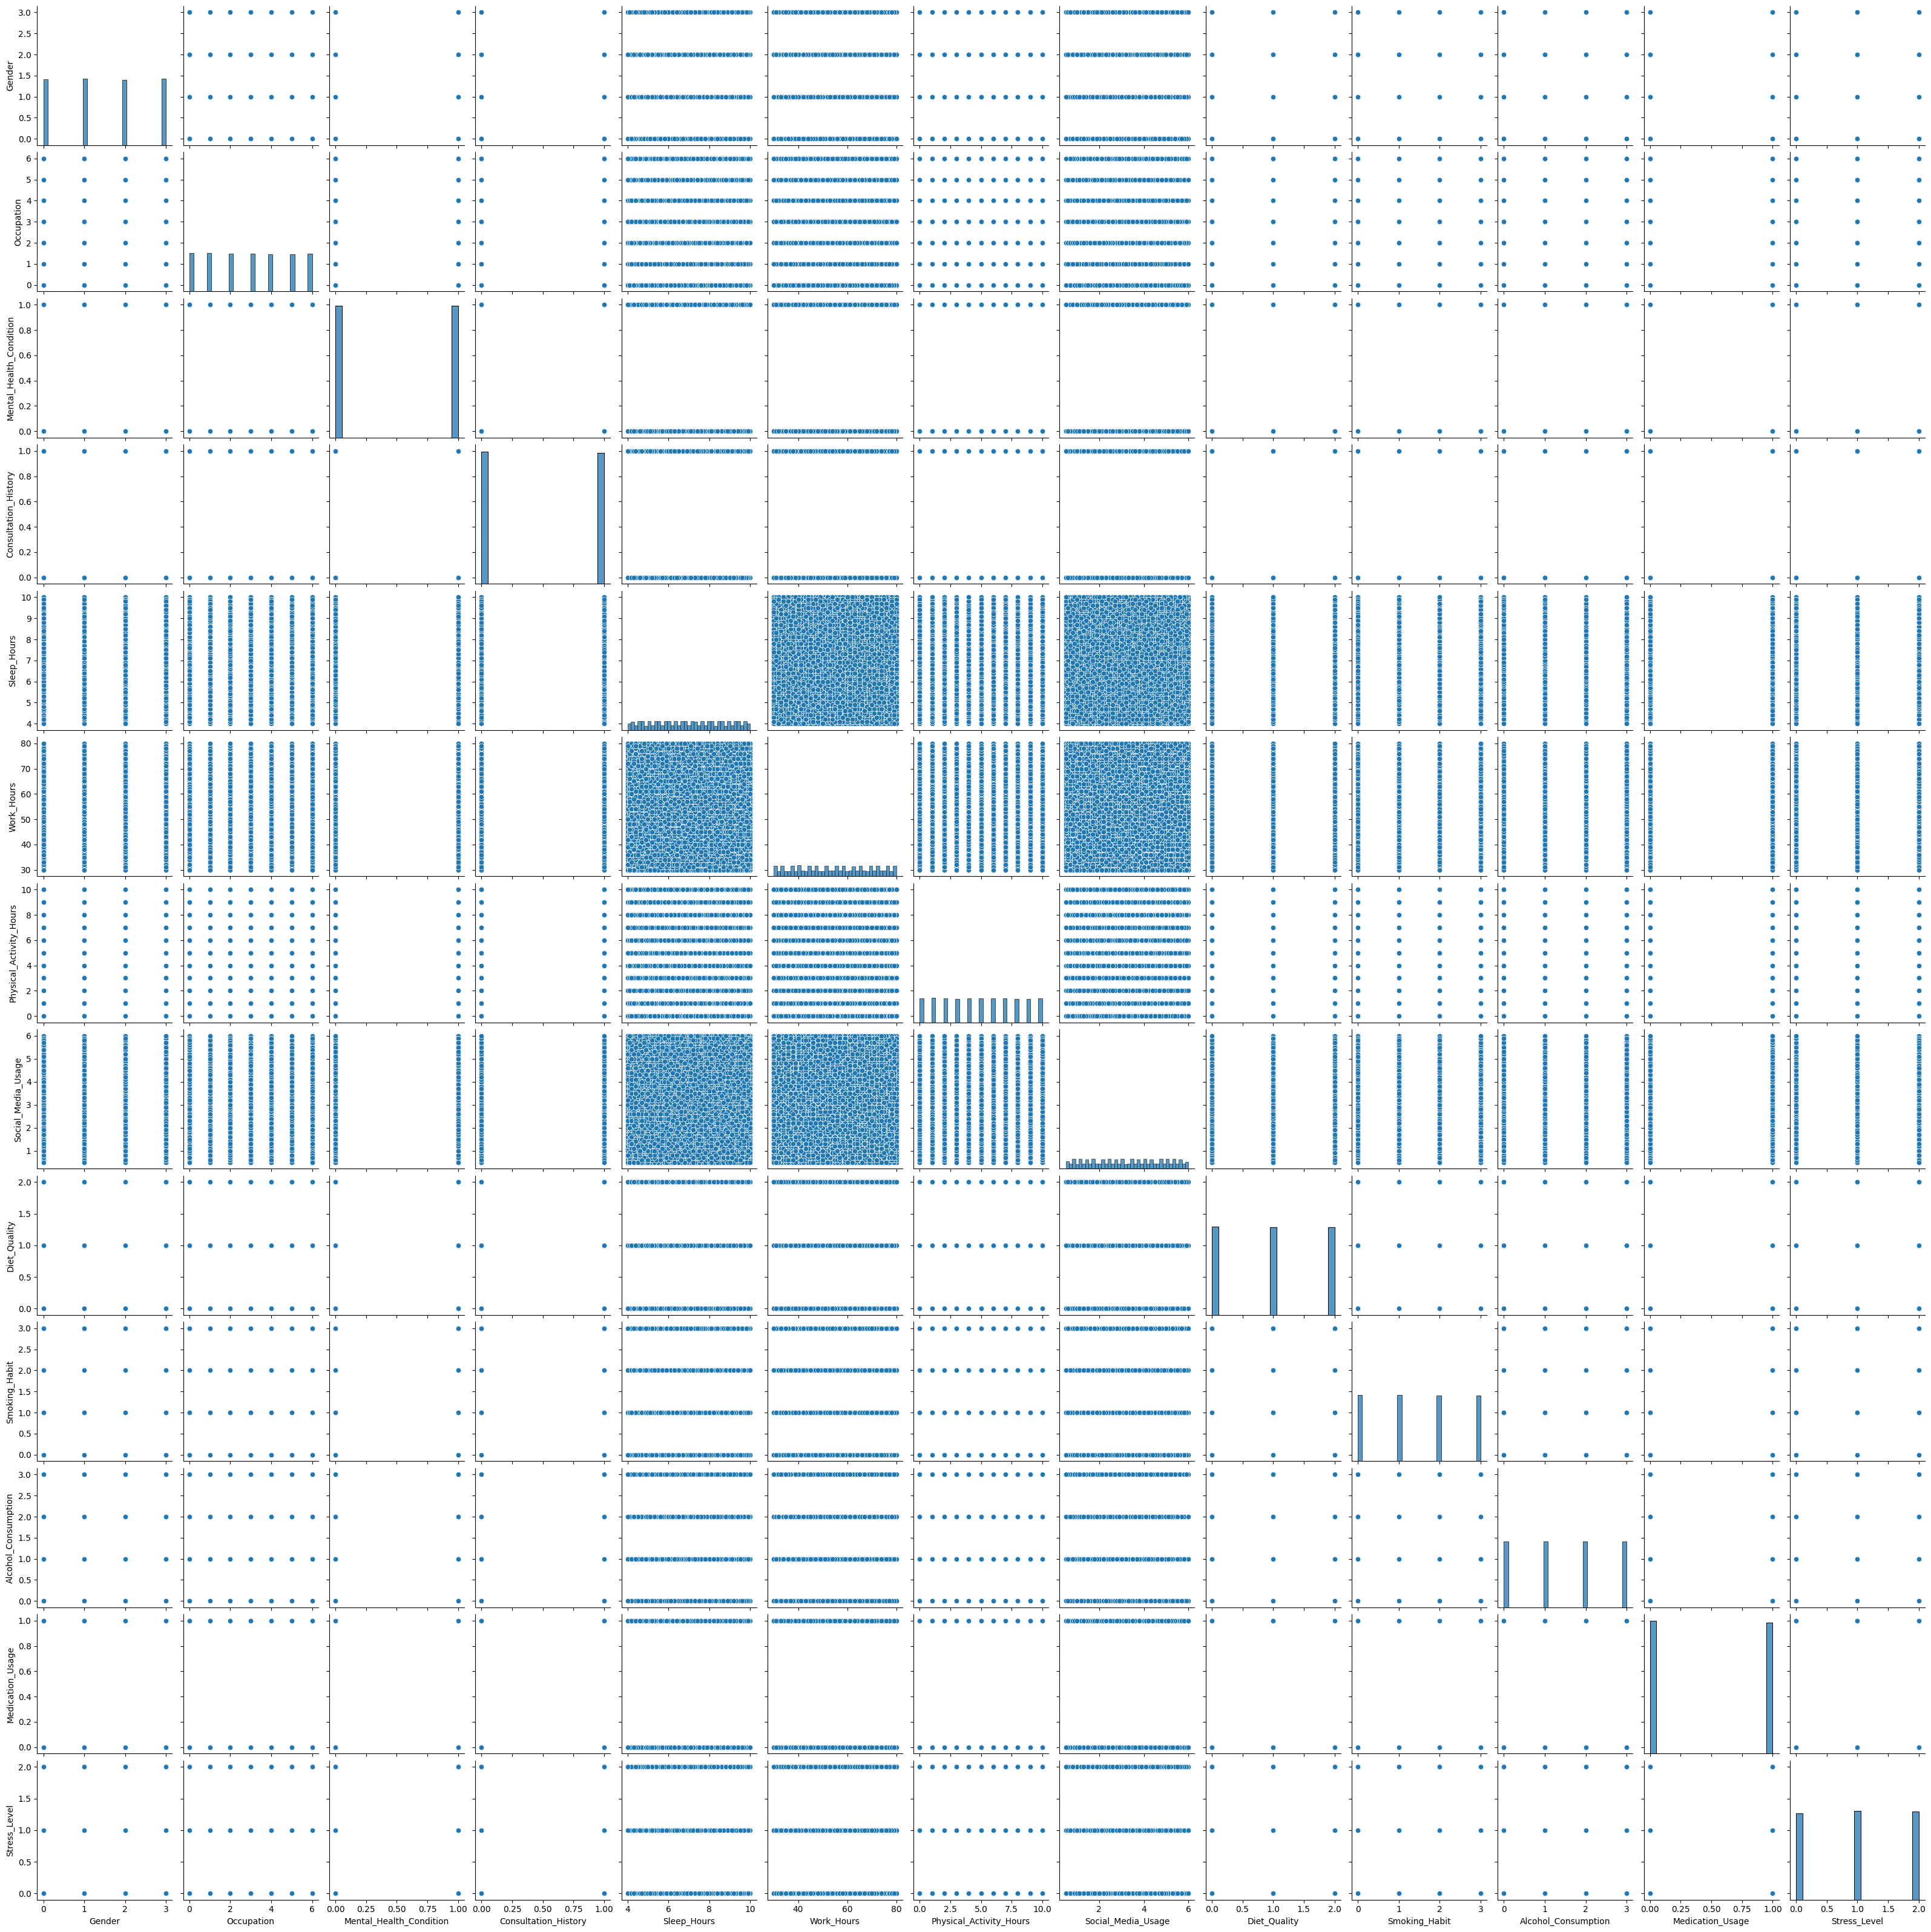

In [ ]:
sns.pairplot(mental_health_data)

#### Feature Selection

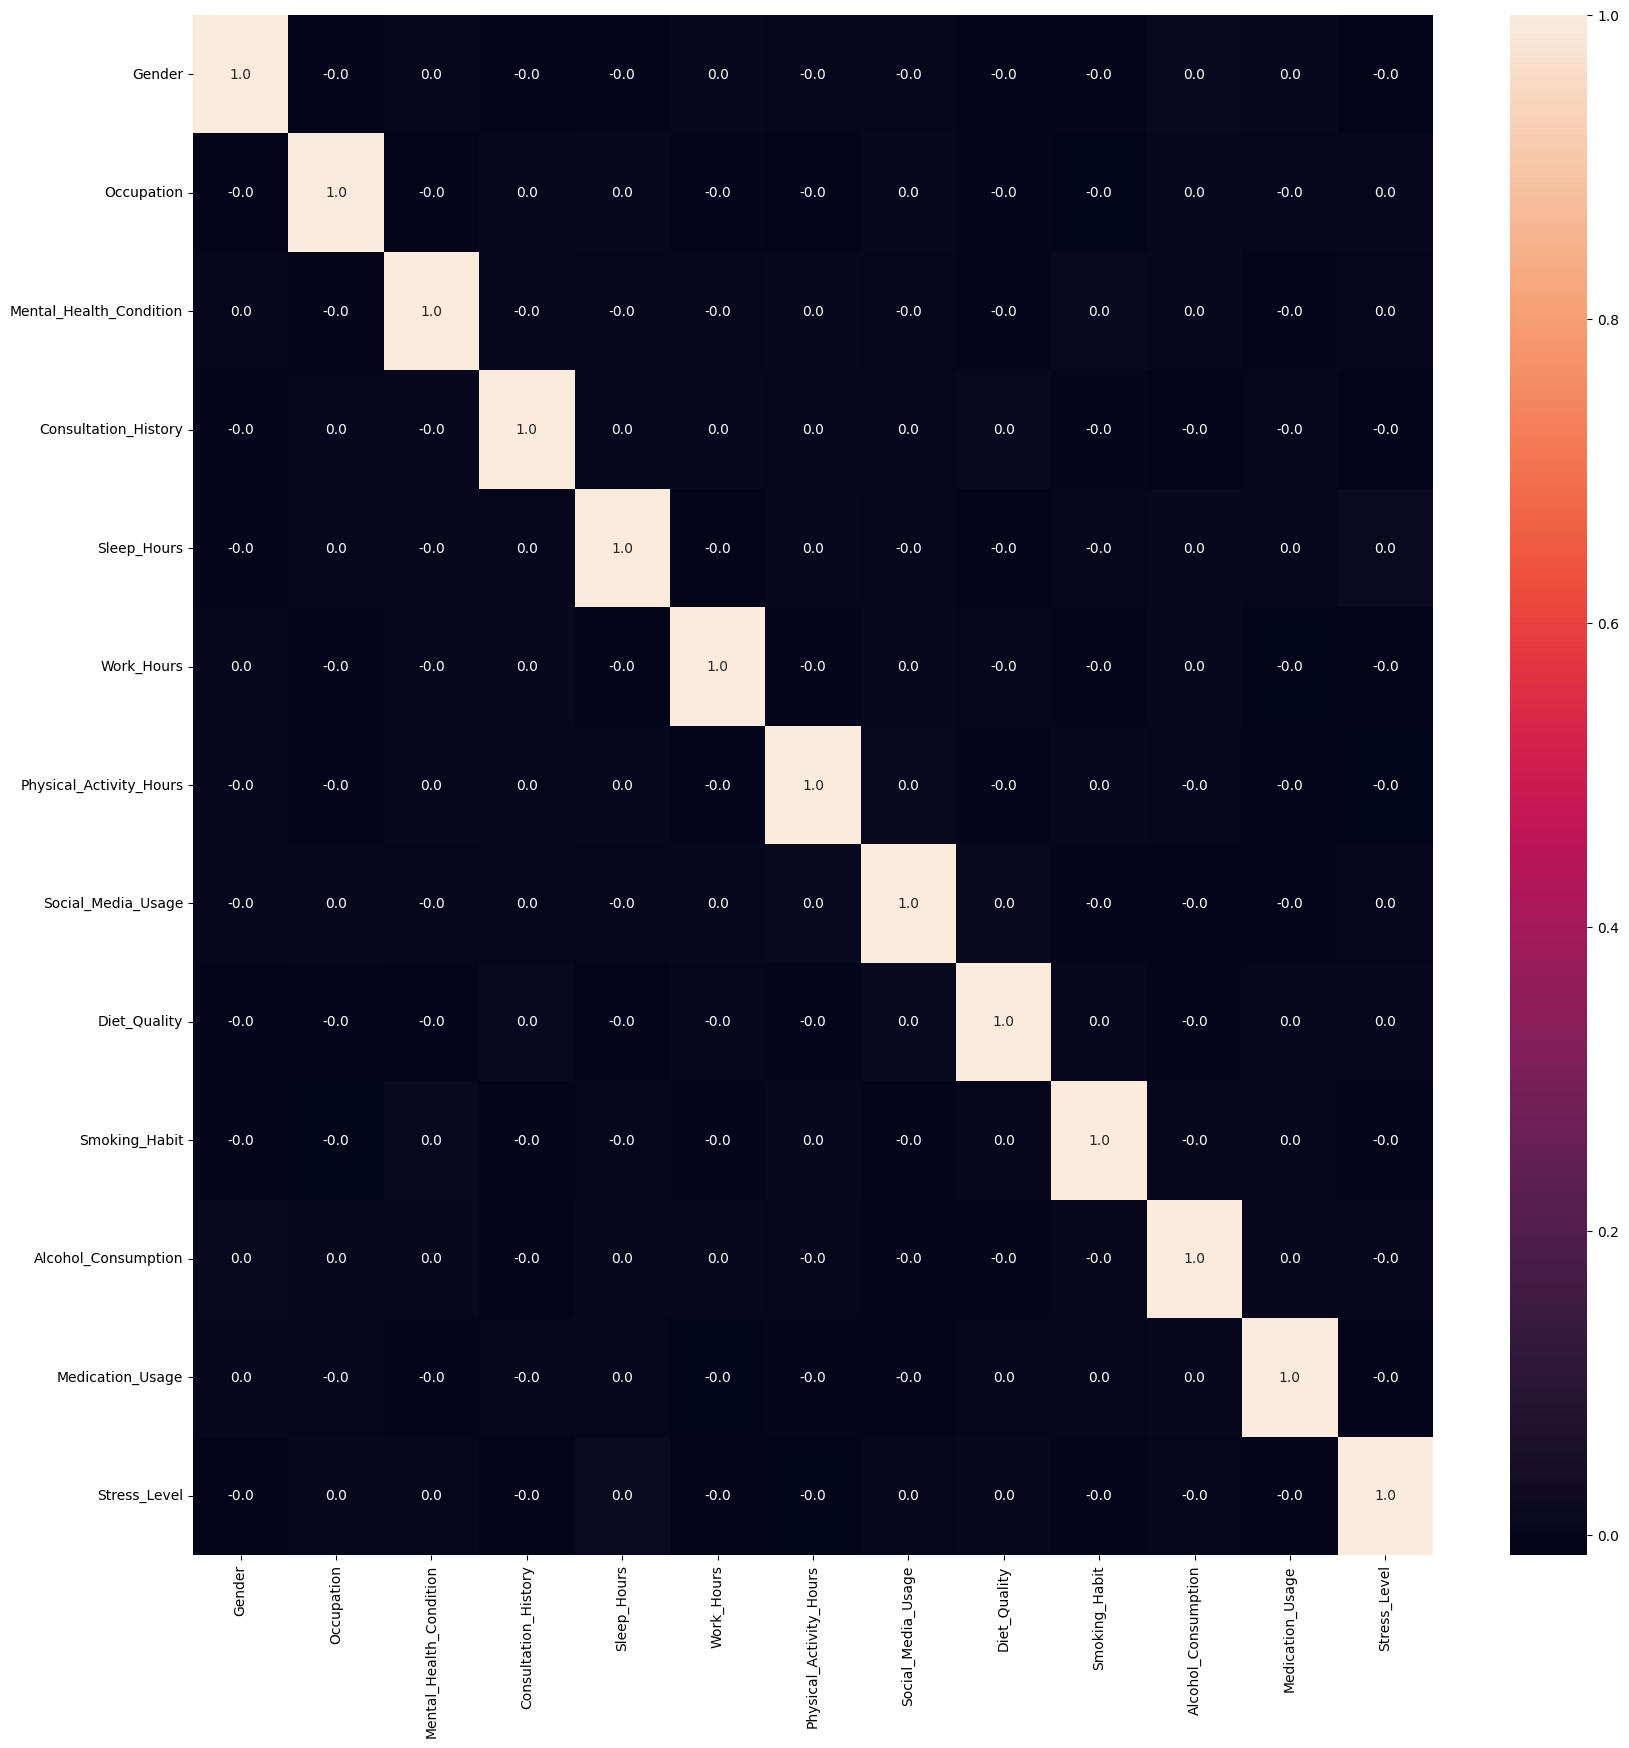

In [ ]:
correlations = mental_health_data.corr()
plt.figure(figsize=(20, 20))
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

The correlations are almost non existant so I will try a different approach to try to fix this issue

In [ ]:
mental_health_data_encoded = pd.read_csv('mental-health-lifestyle-data/mental_health_data final data.csv')
mental_health_data_encoded.drop('Severity', axis=1, inplace=True)

mental_health_data_encoded.drop(['User_ID', 'Age', 'Country'], axis=1, inplace=True)
mental_health_data_encoded = mental_health_data_encoded[['Gender', 'Occupation', 'Mental_Health_Condition', 'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage', 'Stress_Level']]

encoder = LabelEncoder()
for col in ['Gender', 'Occupation', 'Mental_Health_Condition', 'Consultation_History',
            'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage', 'Stress_Level']:
    mental_health_data_encoded[col] = encoder.fit_transform(mental_health_data[col])

scaler = MinMaxScaler()
numerical_cols = ['Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage']
mental_health_data_encoded[numerical_cols] = scaler.fit_transform(mental_health_data_encoded[numerical_cols])
mental_health_data_encoded.head()



Gender  Occupation  Mental_Health_Condition  Consultation_History  \
0       0           3                        1                     1   
1       0           4                        0                     0   
2       3           5                        0                     1   
3       2           4                        0                     0   
4       0           0                        1                     1   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0     0.600000        0.32                      0.8            0.309091   
1     0.466667        0.88                      0.2            0.527273   
2     0.516667        0.94                      0.9            0.981818   
3     0.483333        0.54                      0.4            0.890909   
4     0.116667        0.30                      1.0            0.509091   

   Diet_Quality  Smoking_Habit  Alcohol_Consumption  Medication_Usage  \
0             2              2                    2                 1   
1             0              3                    1                 0   
2             2              3                    1                 0   
3             1              2                    2                 0   
4             0              2                    0                 1   

   Stress_Level  
0             0  
1             0  
2             1  
3             0  
4             2

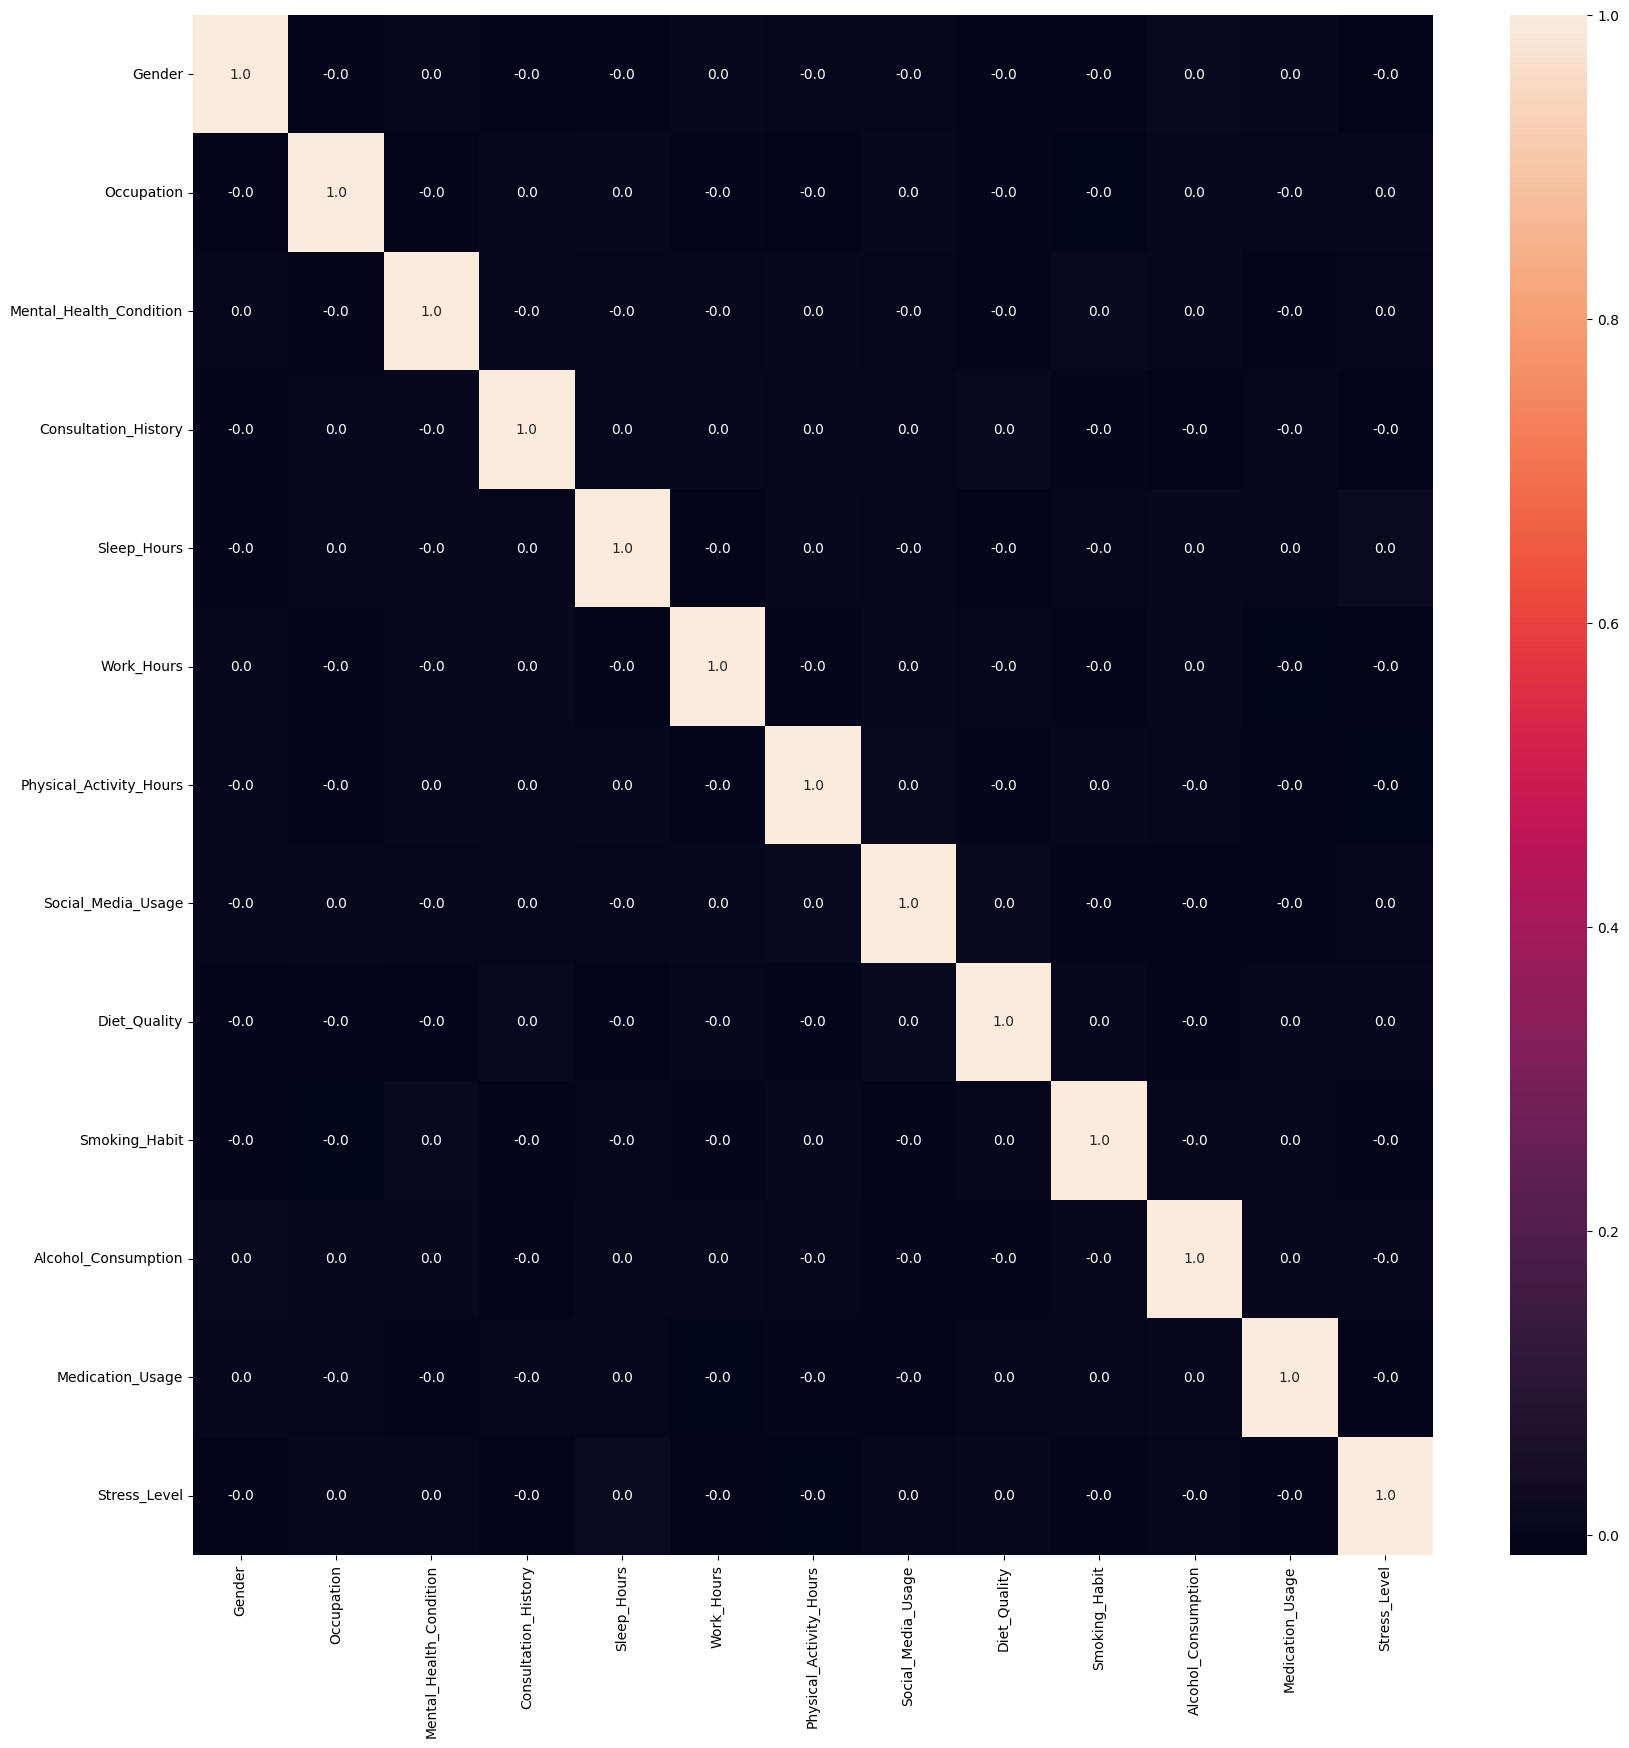

In [ ]:
correlations = mental_health_data_encoded.corr()
plt.figure(figsize=(20, 20))
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

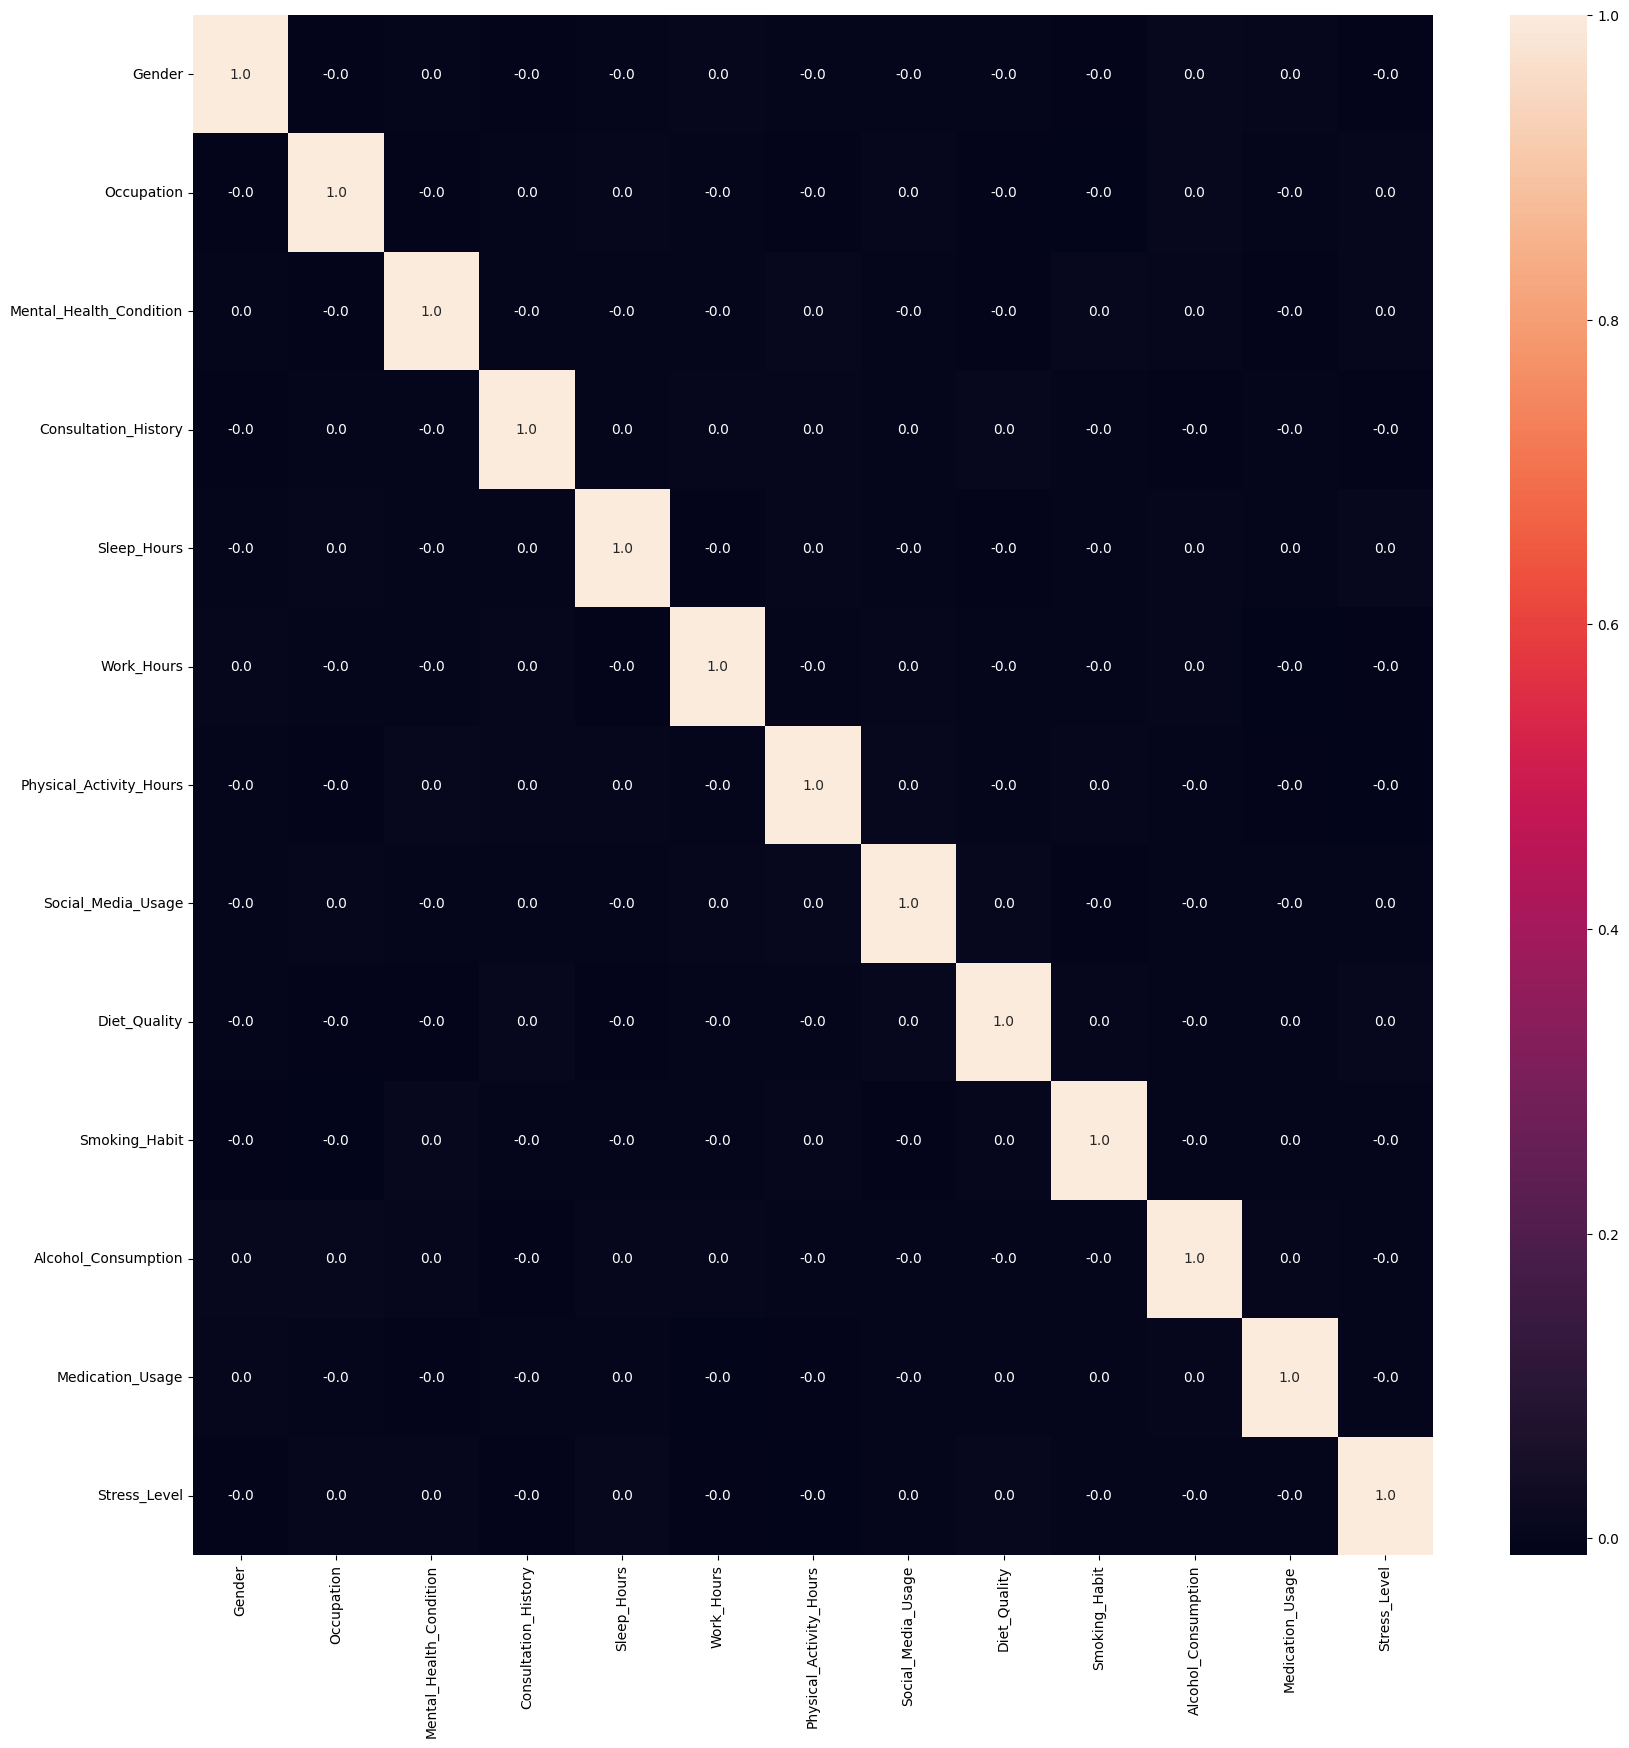

In [ ]:
correlations = mental_health_data.corr(method='kendall')
plt.figure(figsize=(20, 20))
plot = sns.heatmap(correlations, cbar=True, annot=True, fmt=".1f")

As none of this worked, I will check the outliers and data distribution

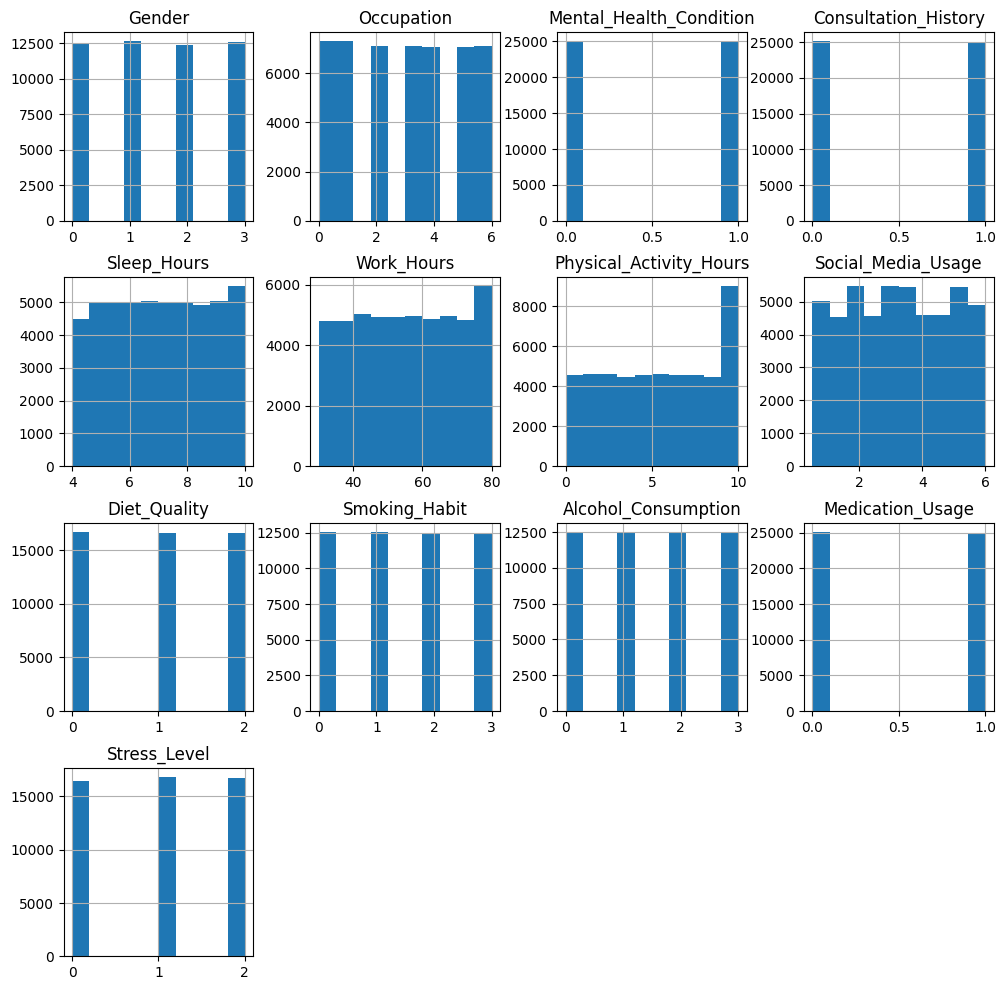

In [ ]:
mental_health_data.hist(figsize=(12,12))
plt.show()

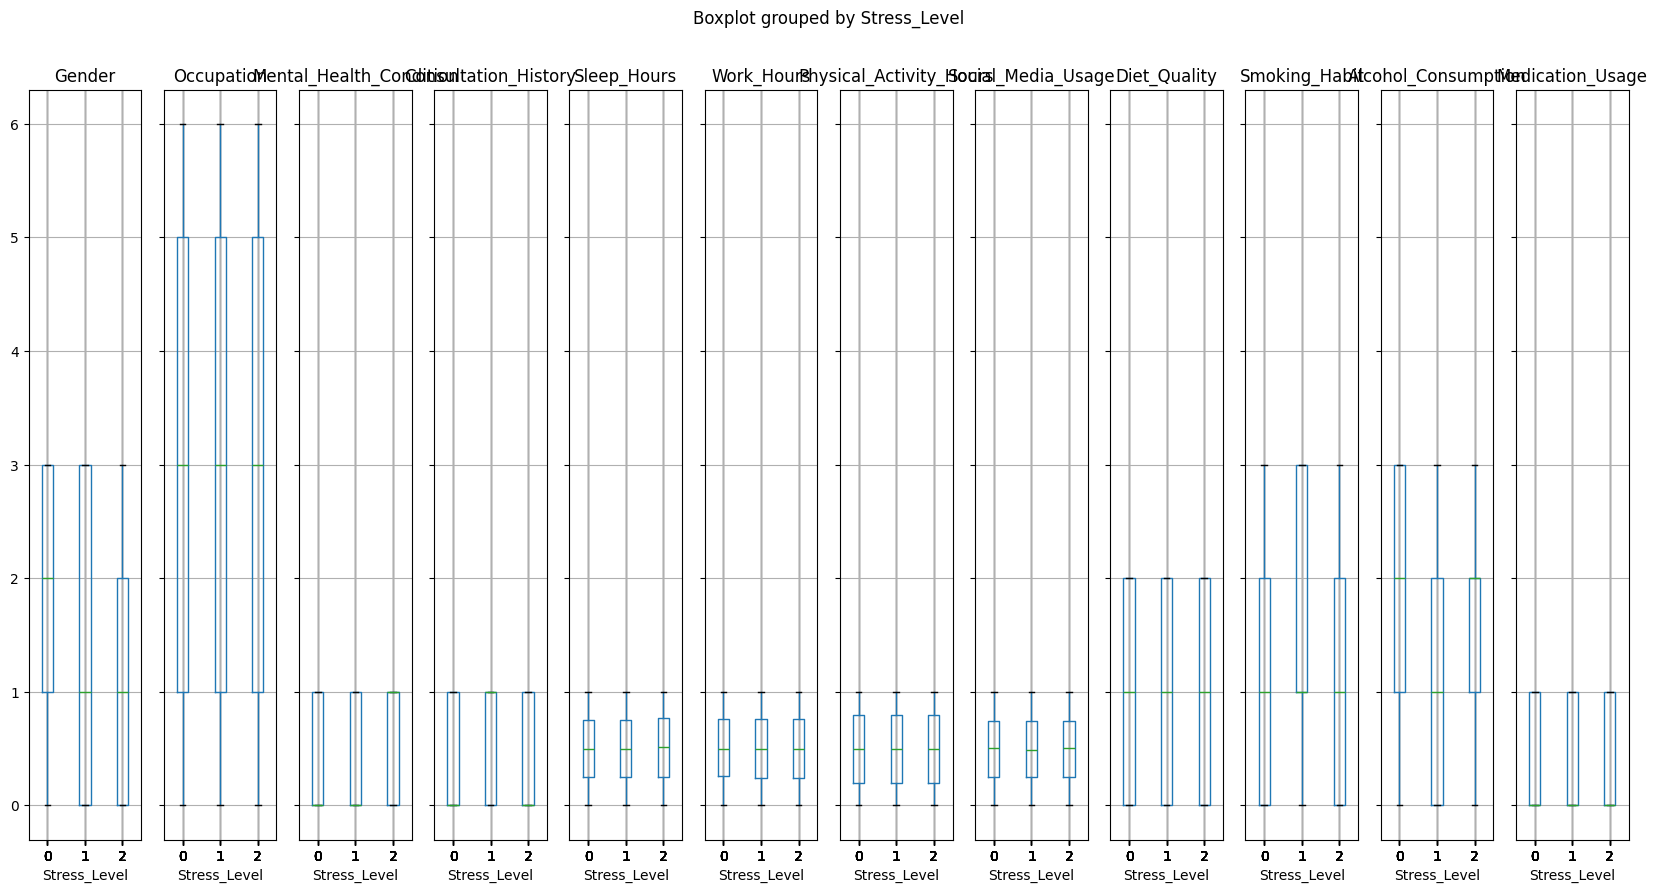

In [ ]:
columns = ['Gender', 'Occupation', 'Mental_Health_Condition', 'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage']
candidates = columns
plot = mental_health_data_encoded.boxplot(column=candidates, by="Stress_Level", figsize=(20,10), layout=(1,len(candidates)))

I don't know why the correlations are so low: there are no outliers, data distribution seems fine. Next thing I will check if there are non linear relations

In [ ]:
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(mental_health_data, 'Stress_Level')
ax.set_ylabel('values')

KeyboardInterrupt: 

: 

: 

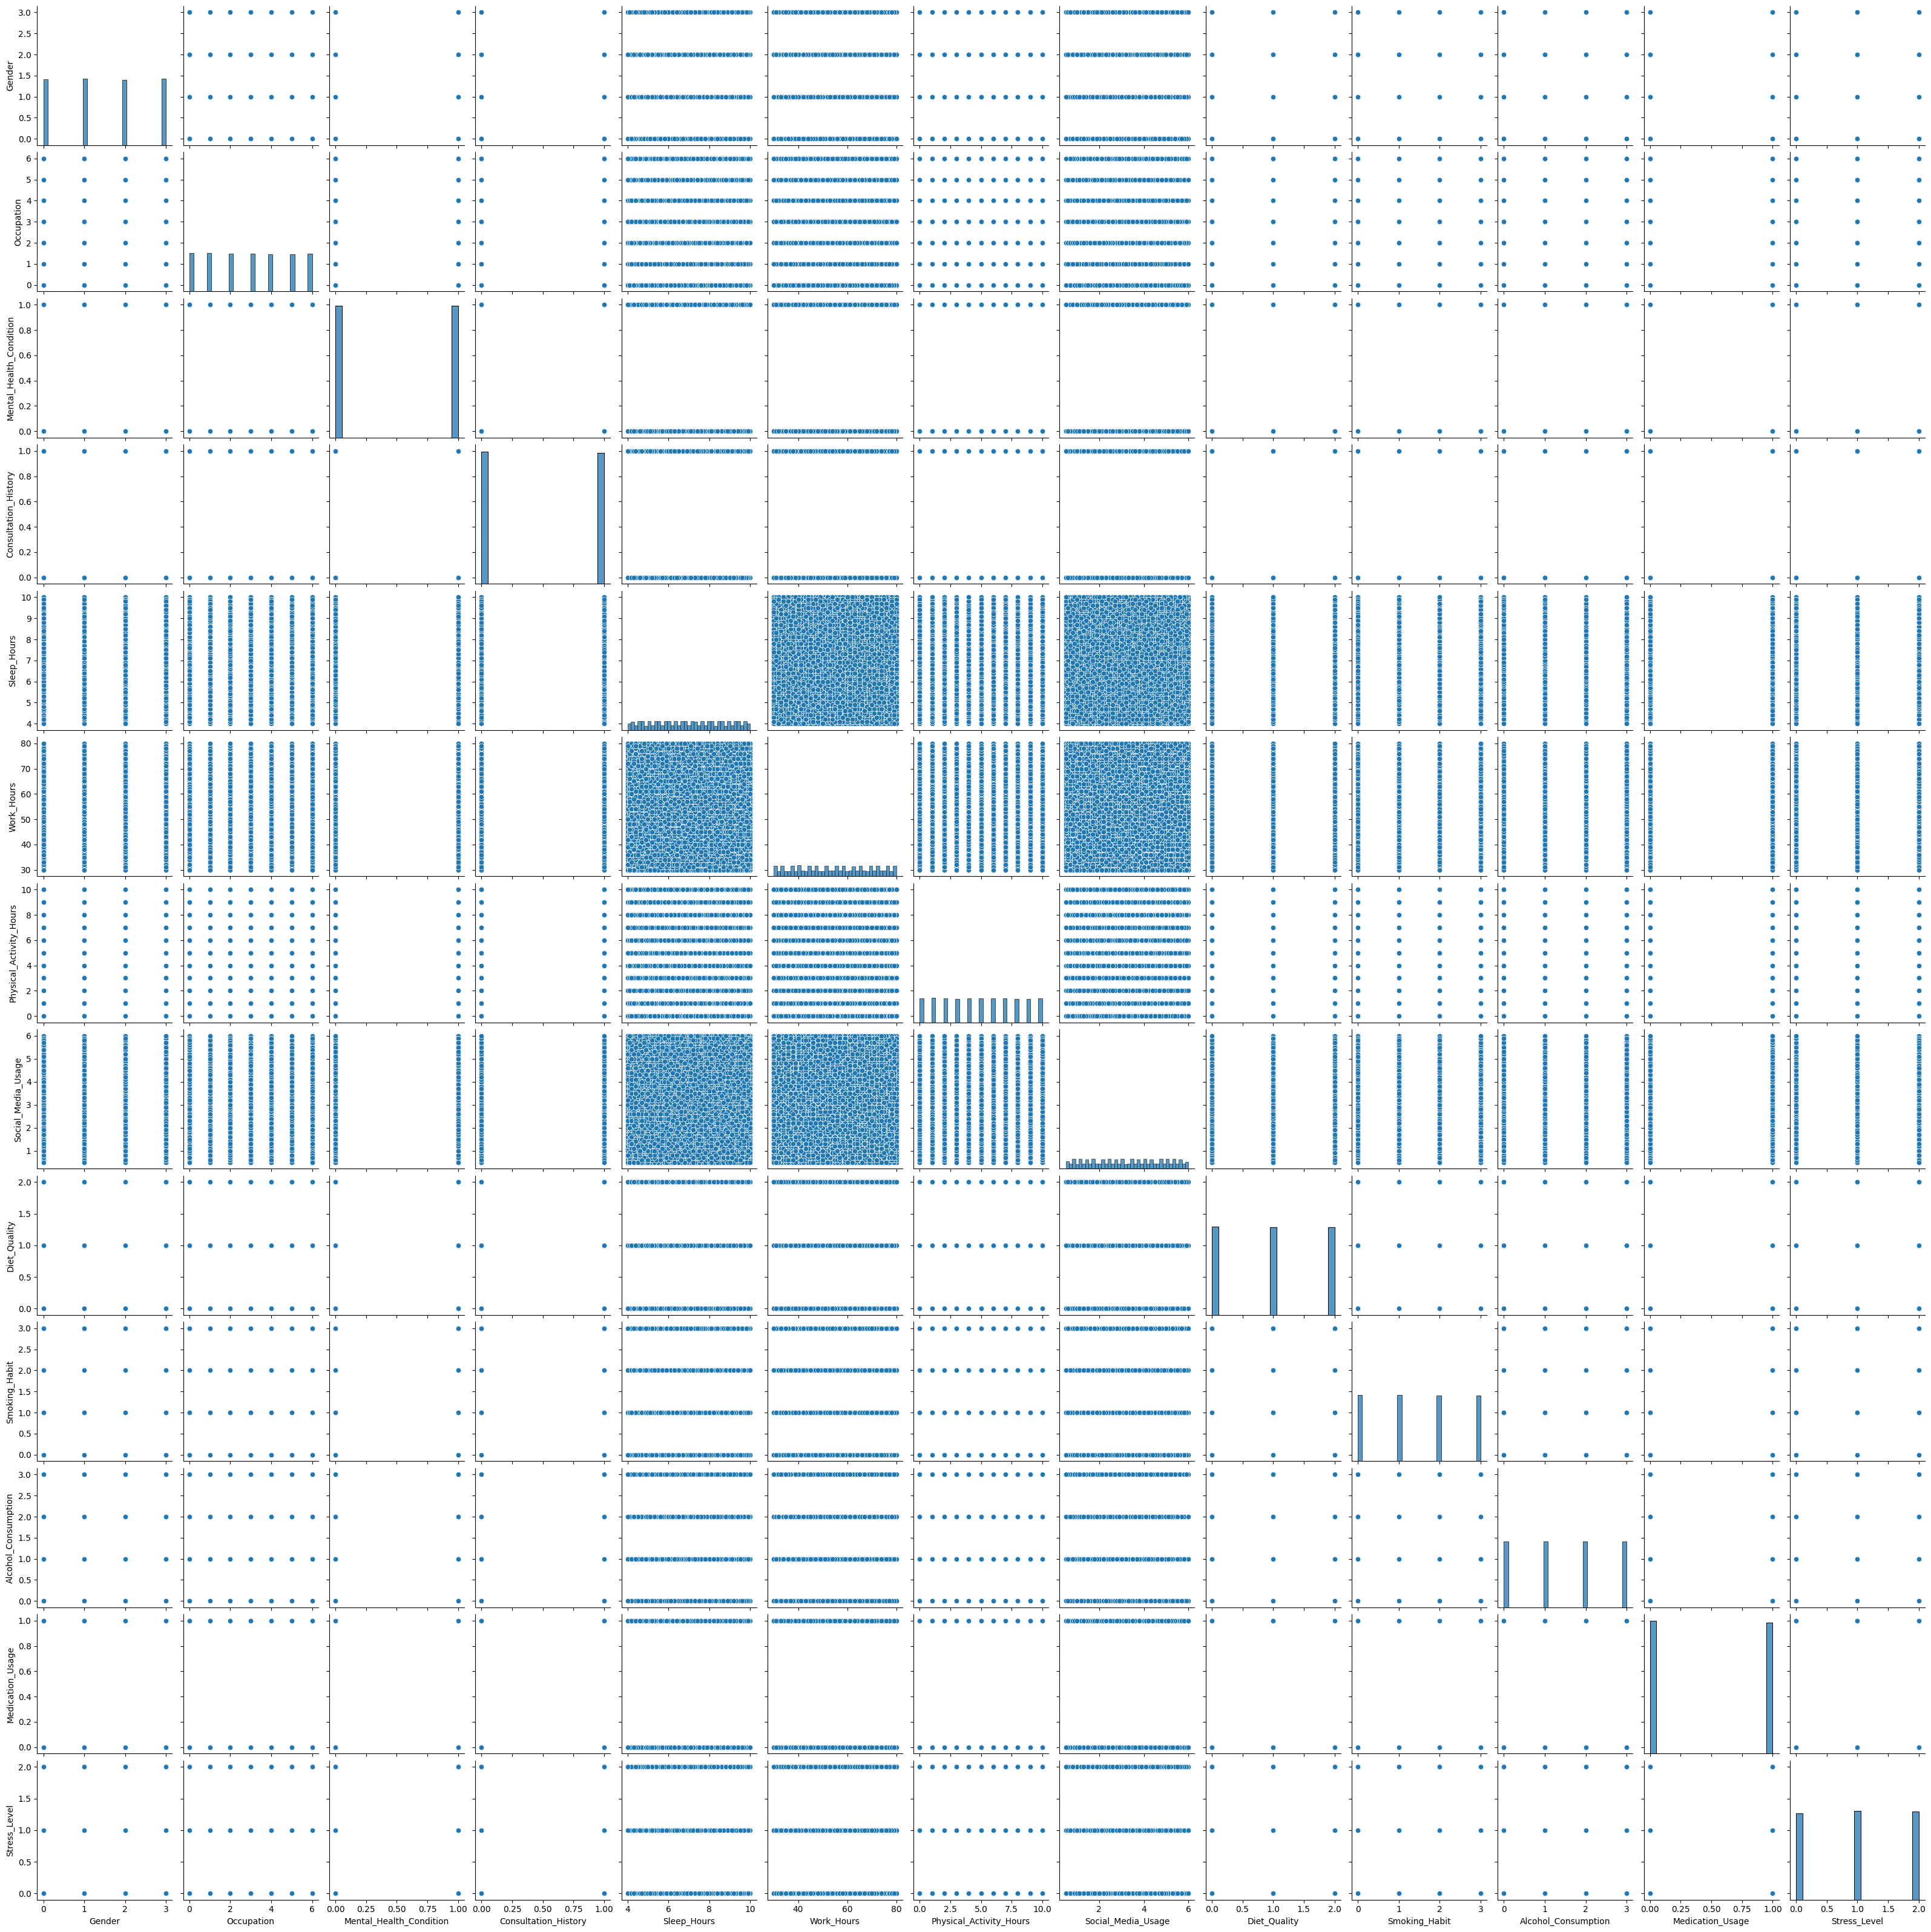

In [ ]:
sns.pairplot(mental_health_data)

In [ ]:
features = ['Gender', 'Occupation', 'Mental_Health_Condition', 'Consultation_History', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours', 'Social_Media_Usage', 'Diet_Quality', 'Smoking_Habit', 'Alcohol_Consumption', 'Medication_Usage']
target = "Stress_Level"

X = mental_health_data_encoded[features]
y = mental_health_data_encoded[target]

#### Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 50000 observations, of which 40000 are now in the train set, and 10000 in the test set.


### Modelling

In [ ]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.3417


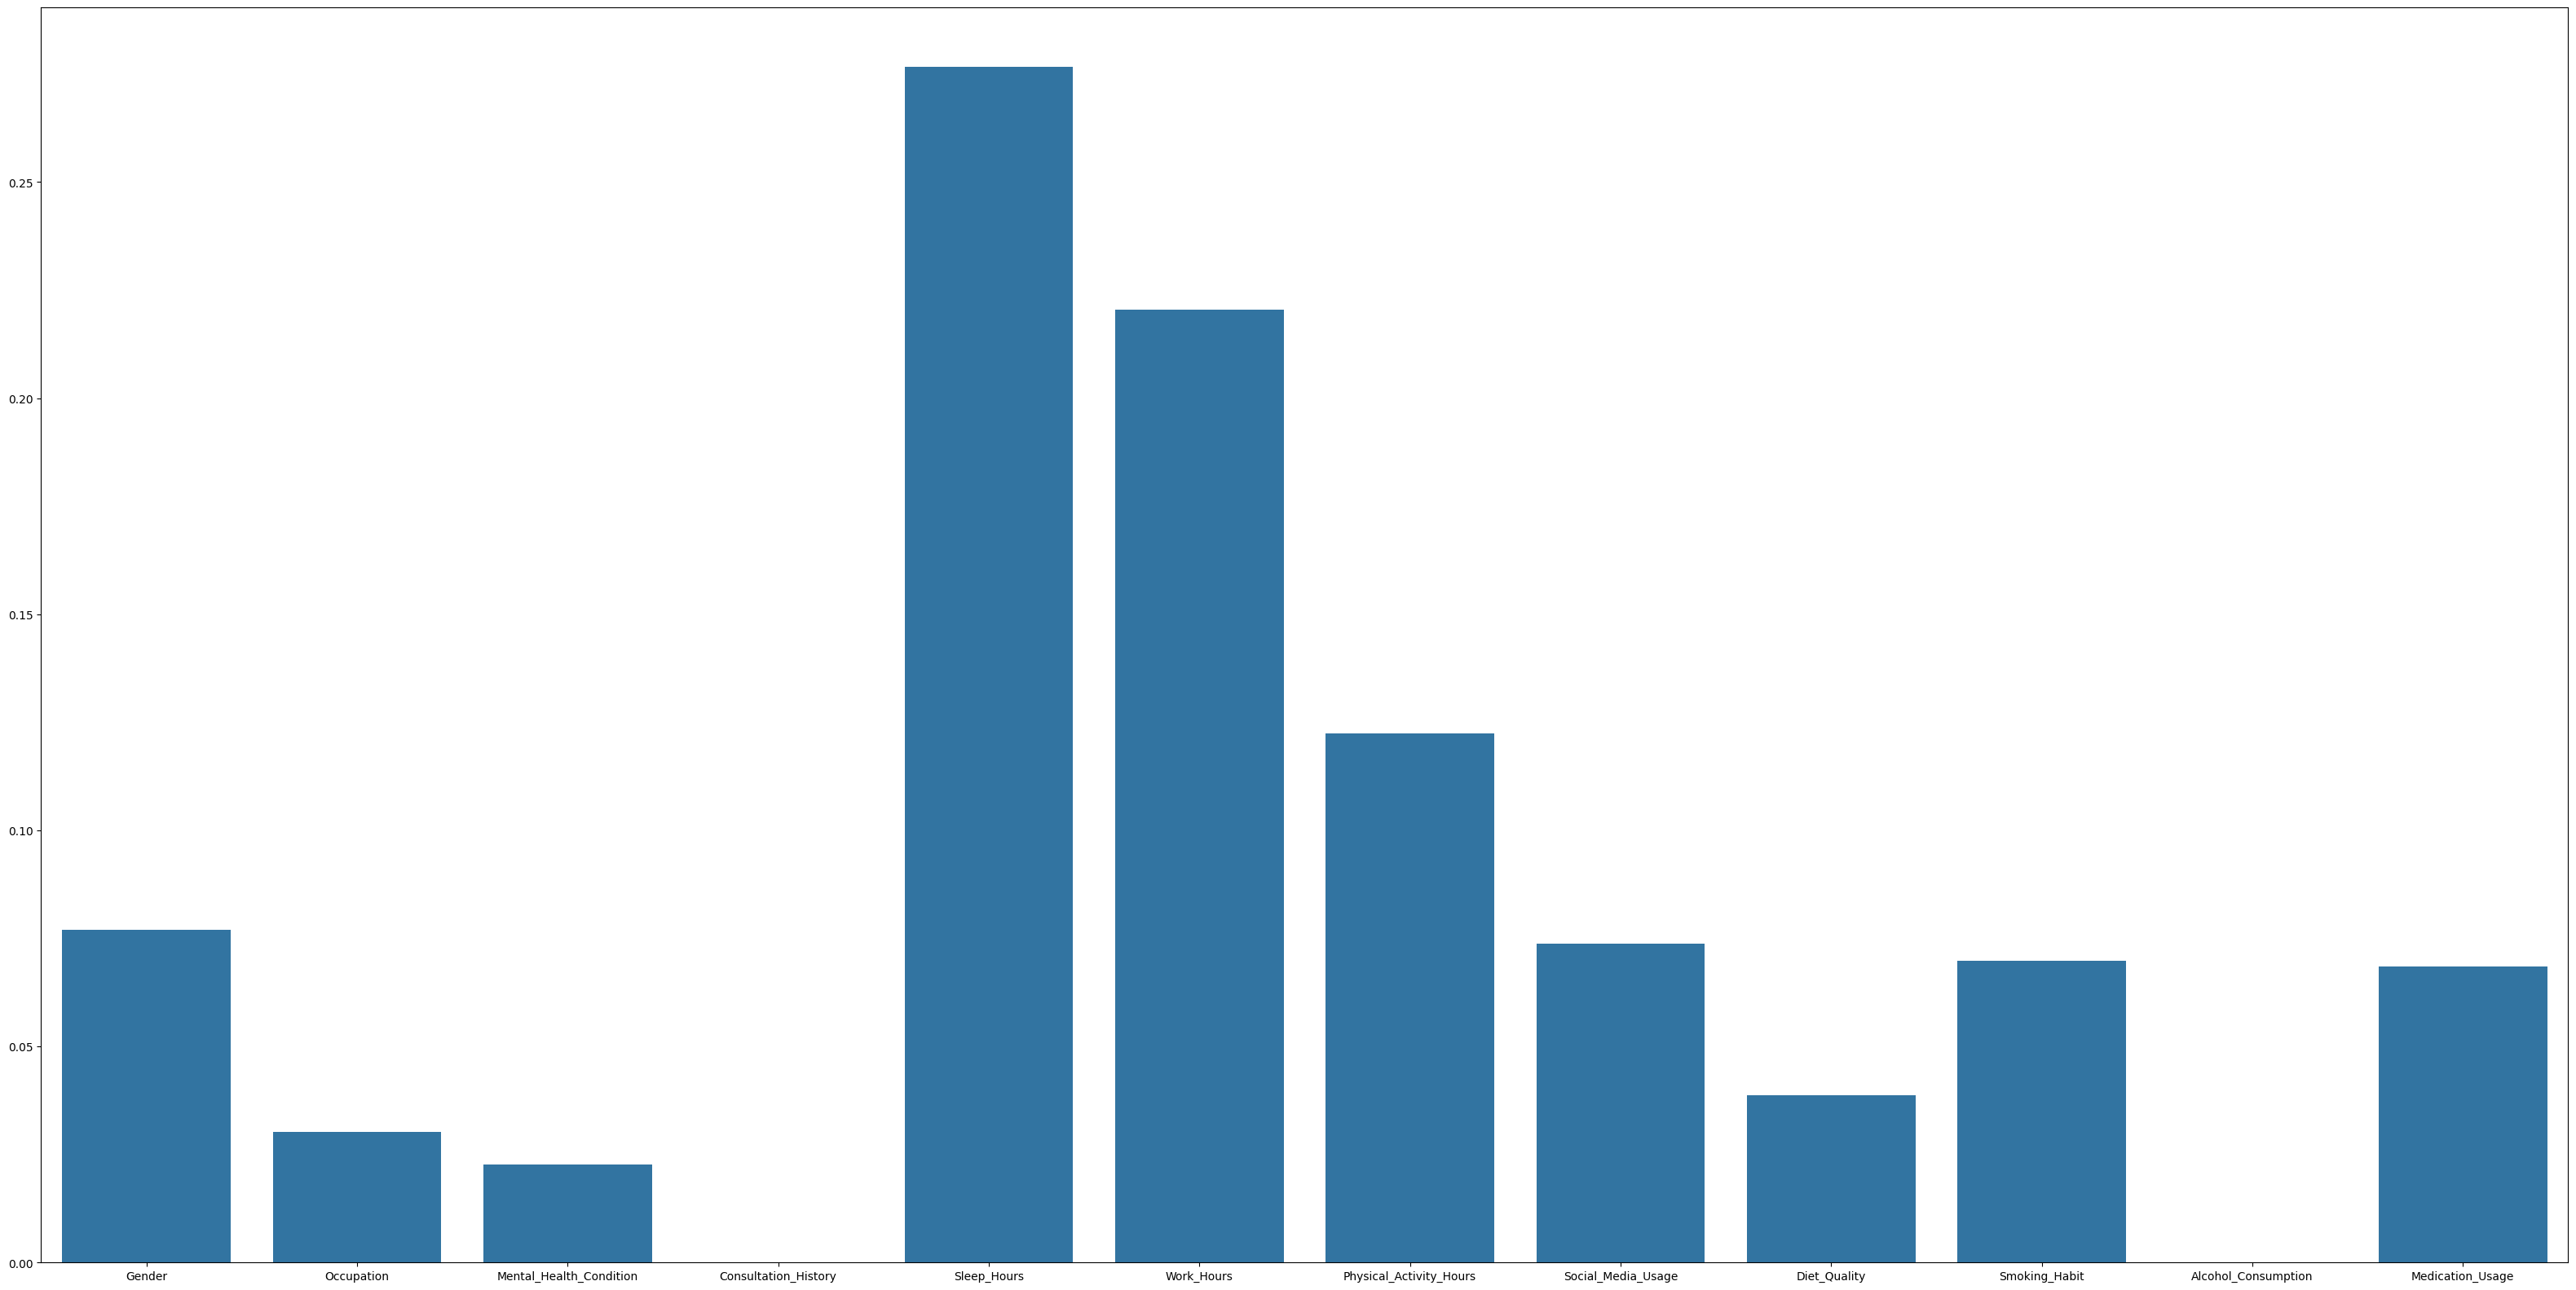

In [ ]:
plt.figure(figsize=(40, 20))
plot = sns.barplot(y=model.feature_importances_, x=features)
plt.show()

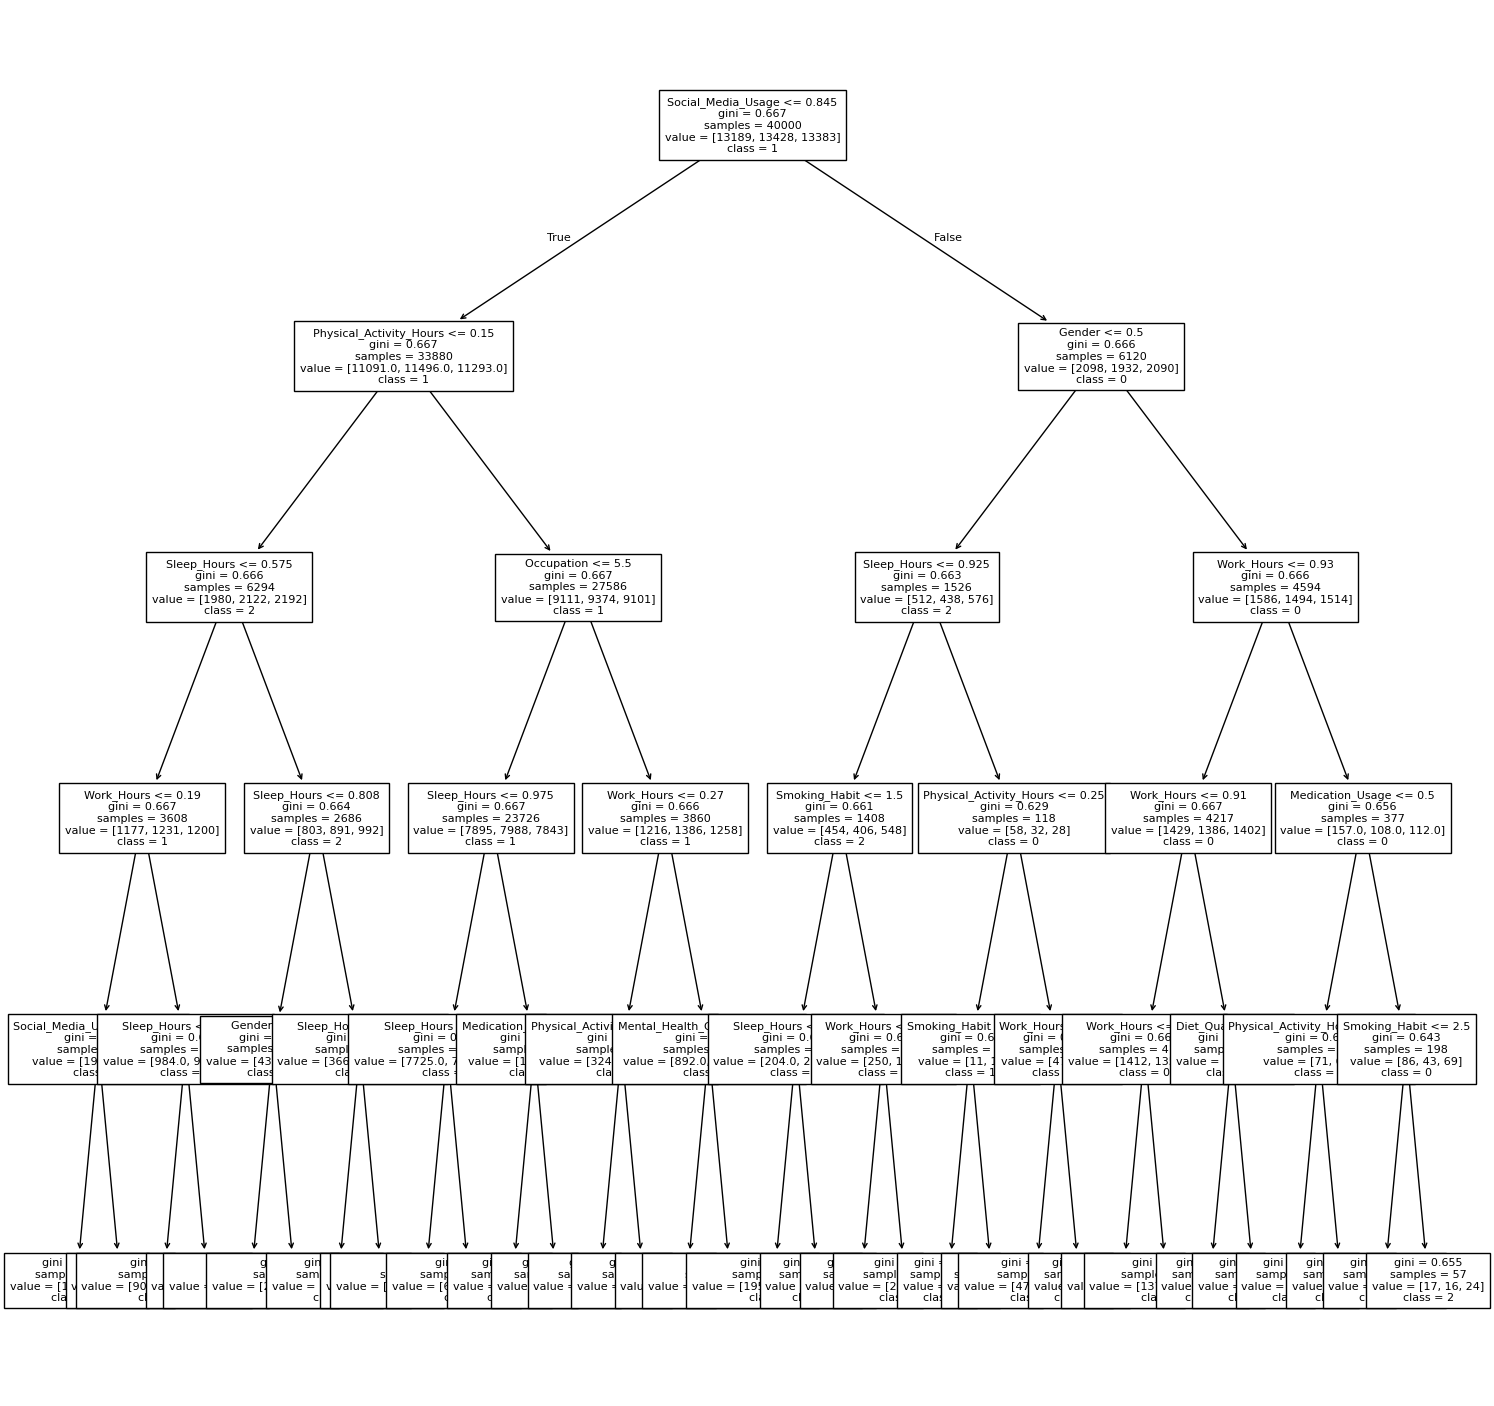

In [ ]:
target_names = ["0", "1", "2"]
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=8, feature_names=features, class_names=target_names)
plt.show()

In [ ]:
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.34      0.12      0.18      3257
           1       0.34      0.72      0.46      3419
           2       0.34      0.17      0.22      3324

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.29     10000
weighted avg       0.34      0.34      0.29     10000



In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.3264


In [ ]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.3224


In [ ]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.3273


In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.3254


The accuracy of the models did not get over 40%, which is bad.